In [1]:
import numpy as np 
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
dict_AuthorCellType_to_lvl_2b_CellType = {
    
    'c01_CD4_Tn_CCR7' : 'CD4+ Tn',
    'c02_CD4_Tn_SELL' : 'CD4+ Tn',
    'c03_CD4_Tn_NR4A2' : 'CD4+ Tn',
    'c04_CD4_Tcm_ANXA1' : 'CD4+ Tcm',   # Central memory
    'c05_CD4_Tcm_GPR183' : 'CD4+ Tcm',  # Central memory
    'c06_CD4_Trm_HSPA1A' : 'CD4+ Trm',  # Tissue-resident memory 
    'c07_CD4_Th17_CTSH' : 'CD4+ Th17',  # Helper 17
    'c08_CD4_Tfh_CXCL13_IL6ST' : 'CD4+ Tfh', # Follicular helper
    'c09_CD4_Th1_CXCL13_HAVCR2' : 'CD4+ Th1',
    'c10_CD4_Temra_GZMB' : 'CD4+ Temra', # Effective memory re-expressing CD45RA
    'c11_CD4_Treg_FOXP3' : 'CD4+ Treg',
    'c12_CD4_Treg_KLRB1' : 'CD4+ Treg',
    'c13_CD4_Treg_TNFRSF9' : 'CD4+ Treg',
    'c14_CD4_MT' : 'CD4+ Tm',   # Memory T?
    
    'c15_CD8_Tn_CCR7' : 'CD8+ Tn',
    'c16_CD8_Tn_SELL' : 'CD8+ Tn',
    'c17_CD8_Tcm_GPR183' : 'CD8+ Tcm',
    'c18_CD8_Tcm_ANXA1' : 'CD8+ Tcm',
    'c19_CD8_Tem_CMC1' : 'CD8+ Tem',
    'c20_CD8_Tem_GZMK' : 'CD8+ Tcm',
    'c21_CD8_Trm_XCL1' : 'CD8+ Trm',
    'c22_CD8_Trm_HSPA1B' : 'CD8+ Trm',
    'c23_CD8_Tex_LAYN' : 'CD8+ Tex',
    'c24_CD8_Temra_CX3CR1' : 'CD8+ Temra',
    'c25_CD8_Temra_TYROBP' : 'CD8+ Temra',
    'c26_CD8_MAIT_KLRB1' : 'N/A',     #! Low cell count
    'c27_CD8_MAIT_SLC4A10' : 'CD8+ MAIT',
    'c28_CD8_IEL_CD160' : 'CD8+ IEL',
    'c29_T_MKI67' : 'CD8+ Proliferating T',
    'c30_gdT_TRDV2' : 'γδ2+ T',
    'c31_DNT' : 'CD4-CD8- T',
    
    'c33_ILC_GZMK' : 'ILC',
    'c34_ILC_NR4A2' : 'ILC',
    'c35_ILC_FCGR3A' : 'N/A',   #! Low cell count
    'c36_ILC_SYNE2' : 'N/A',    #! Low cell count
    'c37_ILC_SLC4A10' : 'ILC',
    'c38_ILC_MKI67' : 'ILC',
    
    'c39_NaiveB_TCL1A' : 'Naive B',
    'c40_NaiveB_IGHD' : 'Naive B',
    'c41_MemB_CD27' : 'Memory B',
    'c42_MemB_GPR183' : 'Memory B',
    'c43_GCB_LRMP' : 'GC B',
    'c44_GCB_MKI67' : 'GC B',
    'c45_PlasmaB_TXNDC5' : 'IGHA+ Plasma',  #! Confirmed IGHA expression
    'c46_PlasmaB_IGHA1' : 'IGHA+ Plasma',   #! Confirmed IGHA expression
    'c47_PlasmaB_IGHG1' : 'IGHG+ Plasma',
    'c48_PlasmaB_MKI67' : 'IGHA+ Plasma',
    
    'c49_Mono_CD14' : 'Monocyte',
    'c50_Mono_FCGR3A' : 'N/A',  #! Low cell count
    'c51_Mono_NFKBIZ' : 'N/A',  #! Low cell count
    'c52_Mast_TPSAB1' : 'Mast',
    'c53_Neu_CXCR2' : 'Neutrophil',
    'c54_pDC_LILRA4' : 'N/A',   #! Low cell count
    'c55_pDC_GZMB' : 'pDC',
    'c56_tDC_SIGLEC6' : 'N/A',  #! Low cell count
    'c57_cDC_CLEC9A' : 'cDC',
    'c58_cDC_CD1C' : 'N/A',     #! Low cell count
    'c59_cDC_IL1B' : 'cDC',
    'c60_cDC_LAMP3' : 'cDC',
    
    'c61_Mph_FCGR3A' : 'Macrophage',
    'c62_Mph_S100A8' : 'Macrophage',
    'c63_Mph_CCL20' : 'Macrophage',
    'c64_Mph_SPP1' : 'Macrophage',
    'c65_Mph_APOE' : 'Macrophage',
    
    'c66_Endo_LYVE1' : 'N/A',   #! Low cell count
    'c67_Endo_ACKR1' : 'Endothelial',
    'c68_Endo_FABP5' : 'Endothelial',
    'c69_Endo_CXCL12' : 'Endothelial',
    'c70_Endo_COL4A1' : 'Endothelial',
    'c71_Endo_MKI67' : 'Endothelial',
    
    'c72_Fibro_SOX6' : 'Fibroblast',
    'c73_Fibro_ADAMDEC1' : 'Fibroblast',
    'c74_Fibro_C7' : 'Fibroblast',
    'c75_Fibro_CCL19' : 'Fibroblast',
    'c76_Fibro_PI16' : 'N/A',   #! Low cell count
    'c77_Fibro_ACTA2' : 'Fibroblast',
    'c78_Fibro_DES' : 'N/A',    #! Low cell count
    'c79_Fibro_FAP' : 'Fibroblast',
    'c80_Fibro_MKI67' : 'Fibroblast',
    'c81_Pericyte_RGS5' : 'Pericyte',
    'c82_SMC_MYH11' : 'SMC',
    'c83_Glia_PLP1' : 'Glial',
    
    'c84_Coloncyte_CA2' : 'Enterocyte',
    'c85_Coloncyte_SLC26A3' : 'Enterocyte',
    'c86_Coloncyte_BEST4' : 'Enterocyte',
    'c87_Goblet_MUC2' : 'Goblet',
    'c88_EEC_PCSK1N' : 'Enteroendocrine',
    'c89_Tuft_PTGS1' : 'Tuft',
    'c90_Epi_MKI67' : 'Intestinal stem',
    'c91_Epi_Tumor' : 'Intestinal stem',
}

In [3]:
dict_PatientID_to_MSI_class = {'SC044': 'MSI-H',
                                'P04': 'MSI-H',
                                'P21': 'MSI-H',
                                'P23': 'MSI-H',
                                'CRC2783': 'MSI-I',
                                'SC035': 'MSI-I',
                                'P15': 'MSI-I',
                                'P19': 'MSI-I',
                                'P20': 'MSI-I',
                                'P22': 'MSI-I',
                                'P26': 'MSI-I',
                                'CRC2817': 'MSI-L',
                                'P17': 'MSI-L',
                                'P18': 'MSI-L'}

In [4]:
def calcSampleEnrichment( T_Proportion, N_Proportion, epsilon=(0.1)**6 ):
    return np.log2( (T_Proportion+epsilon)/(N_Proportion+epsilon) )

def getSummarizedInfo( adata, CellTypeProportionByPatient ):

    list_PatientID = list(set(adata.obs['PatientID']))
    dict_PatientID_to_MSI_intensity = { PatientID : np.mean(edf[(edf['Manual_CellType_lvl_2']=='Tumor epithelial')]['MSI_score']) for PatientID, edf in adata.obs.groupby('PatientID', ) } 
    print(dict_PatientID_to_MSI_intensity)
    AssociationWithMSIByCellType = list()

    for CellType, edf in CellTypeProportionByPatient[CellTypeProportionByPatient['BiopsySite']=='Tumor'].groupby('CellType', observed=True,):
        dict_PatientID_to_Proportion = { tup.PatientID : tup.Proportion for tup in edf.itertuples() }
        c = 0
        for PatientID in list_PatientID:
            try: dict_PatientID_to_Proportion[PatientID]
            except KeyError: 
                c += 1
                dict_PatientID_to_Proportion[PatientID] = 0
                
        x, y = [ dict_PatientID_to_Proportion[p] for p in list_PatientID ], [ dict_PatientID_to_MSI_intensity[p] for p in list_PatientID ]
        r, pval = scipy.stats.spearmanr( x, y, )
        # if CellType == 'CD8+ Proliferating T':
        #     sns.regplot(x=x,y=y)
        AssociationWithMSIByCellType.append( [CellType, r, pval, len(list_PatientID)-c] )

    AssociationWithMSIByCellType = pd.DataFrame(AssociationWithMSIByCellType, columns=['CellType', 'R', 'pval', 'n_patients'])

    SampleEnrichmentByCellType = list()
    T_totalCellCount = sum(CellTypeProportionByPatient[CellTypeProportionByPatient['BiopsySite']=='Tumor']['Count'])
    N_totalCellCount = sum(CellTypeProportionByPatient[CellTypeProportionByPatient['BiopsySite']=='Normal']['Count'])
    dict_BiopsySite_to_TotalCount = { 'Tumor' : T_totalCellCount,'Normal' : N_totalCellCount }

    for CellType, edf in CellTypeProportionByPatient.groupby('CellType'):
        # dict_BiopsySite_to_Proportion = { tup.BiopsySite : tup.Proportion for tup in edf.itertuples() }
        dict_BiopsySite_to_Proportion = { BiopsySite : sum(edf2['Count'])/dict_BiopsySite_to_TotalCount[BiopsySite] for BiopsySite, edf2 in edf.groupby('BiopsySite') }
        if 'Tumor' not in list(dict_BiopsySite_to_Proportion.keys()): dict_BiopsySite_to_Proportion['Tumor'] = 0 
        if 'Normal' not in list(dict_BiopsySite_to_Proportion.keys()): dict_BiopsySite_to_Proportion['Normal'] = 0 

        SampleEnrichmentByCellType.append( [CellType, calcSampleEnrichment(dict_BiopsySite_to_Proportion['Tumor'], dict_BiopsySite_to_Proportion['Normal'])] )
    SampleEnrichmentByCellType = pd.DataFrame(SampleEnrichmentByCellType, columns=['CellType', 'Enrichment'])

    dict_CellType_to_SummarizedInfo = dict()
    for tup in SampleEnrichmentByCellType[SampleEnrichmentByCellType['CellType'].isin( AssociationWithMSIByCellType['CellType'] )].itertuples():
        dict_CellType_to_SummarizedInfo[tup.CellType] = [tup.Enrichment] 
    for tup in AssociationWithMSIByCellType[AssociationWithMSIByCellType['CellType'].isin( SampleEnrichmentByCellType['CellType'] )].itertuples():
        dict_CellType_to_SummarizedInfo[tup.CellType].append( tup.R )
        dict_CellType_to_SummarizedInfo[tup.CellType].append( tup.pval )
        dict_CellType_to_SummarizedInfo[tup.CellType].append( tup.n_patients )

    SummarizedInfo = pd.DataFrame(dict_CellType_to_SummarizedInfo).T
    SummarizedInfo.reset_index(inplace=True)
    SummarizedInfo.columns = ['CellType', 'TissueEnrichment', 'CorrelationWithMSI', 'Pvalue', 'n_patients']
    return SummarizedInfo

In [5]:
adata_C = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/Chen.MSI.preprocessed.NanoMnT.ManualAnnot.MSI_score_labeled.lvl3.h5ad')
adata_J = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/Joanito.MSI.preprocessed.NanoMnT.ManualAnnot.MSI_score_labeled.lvl3.h5ad')
adata_C.obs['Author_CellType_lvl_1b'] = [ dict_AuthorCellType_to_lvl_2b_CellType[ACT] for ACT in adata_C.obs['Author_CellType_lvl_2'] ]

In [6]:
adata_C = adata_C.raw.to_adata()
sc.pp.normalize_total(adata_C)
sc.pp.log1p(adata_C)

adata_J = adata_J.raw.to_adata()
sc.pp.normalize_total(adata_J)
sc.pp.log1p(adata_J)

In [7]:
dict_PatientID_C_to_TumorCellCount = { PatientID : len(edf) for PatientID, edf in adata_C.obs[(adata_C.obs['Manual_CellType_lvl_3']=='Tumor cell')].groupby('PatientID', observed=True) }
dict_PatientID_J_to_TumorCellCount = { PatientID : len(edf) for PatientID, edf in adata_J.obs[(adata_J.obs['Manual_CellType_lvl_3']=='Tumor cell')].groupby('PatientID', observed=True) }

CellTypeProportion_C = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/4_TME/CellTypeProportion.tsv', sep='\t')
CellTypeProportion_C['MSI_class'] = [ dict_PatientID_to_MSI_class[PID] for PID in CellTypeProportion_C['PatientID'] ]
CellTypeProportion_C['TumorCellCount'] = [ dict_PatientID_C_to_TumorCellCount[PID] for PID in CellTypeProportion_C['PatientID'] ]
CellTypeProportion_C['TumorRelativeCount'] = CellTypeProportion_C['Count']/CellTypeProportion_C['TumorCellCount']

CellTypeProportion_J = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/4_TME/CellTypeProportion.tsv', sep='\t')
CellTypeProportion_J['MSI_class'] = [ dict_PatientID_to_MSI_class[PID] for PID in CellTypeProportion_J['PatientID'] ]
CellTypeProportion_J['TumorCellCount'] = [ dict_PatientID_J_to_TumorCellCount[PID] for PID in CellTypeProportion_J['PatientID'] ]
CellTypeProportion_J['TumorRelativeCount'] = CellTypeProportion_J['Count']/CellTypeProportion_J['TumorCellCount']

## Pie chart to show broad composition of cell types

#### Chen

In [139]:
dict_AuthorCellTypeLvl1b_to_Broad = dict()
for ct in set(CellTypeProportion_C['CellType']):
    if "CD4" in ct:
        dict_AuthorCellTypeLvl1b_to_Broad[ct] = 'CD4+ T'
    elif "CD8" in ct:
        dict_AuthorCellTypeLvl1b_to_Broad[ct] = 'CD8+ T'
    elif "γδ2" in ct or 'ILC' in ct:
        dict_AuthorCellTypeLvl1b_to_Broad[ct] = 'CD8+ T'
    elif ct in ['Glial', 'Endothelial', 'Fibroblast', 'SMC', 'Pericyte']:
        dict_AuthorCellTypeLvl1b_to_Broad[ct] = 'Stromal'
    elif ct in ['GC B', 'Memory B', 'Naive B']:
        dict_AuthorCellTypeLvl1b_to_Broad[ct] = 'B'
    elif "Plasma" in ct:
        dict_AuthorCellTypeLvl1b_to_Broad[ct] = 'Plasma'
    else:
        dict_AuthorCellTypeLvl1b_to_Broad[ct] = 'Myeloid'
        
dict_AuthorCellTypeLvl1b_to_Broad = { Author_CellType_lvl_1b : edf.iloc[0].Author_CellType_lvl_1 for Author_CellType_lvl_1b, edf in adata_C.obs.groupby('Author_CellType_lvl_1b') }
for k,v in dict_AuthorCellTypeLvl1b_to_Broad.items():
    if ('CD8' in k) or ('γδ2' in k):
        dict_AuthorCellTypeLvl1b_to_Broad[k] = 'CD8+ T'
    elif 'CD4' in k:
        dict_AuthorCellTypeLvl1b_to_Broad[k] = 'CD4+ T'
        
CellTypeProportion_C['BroadCellType'] = [ dict_AuthorCellTypeLvl1b_to_Broad[ACT] for ACT in CellTypeProportion_C['CellType'] ]

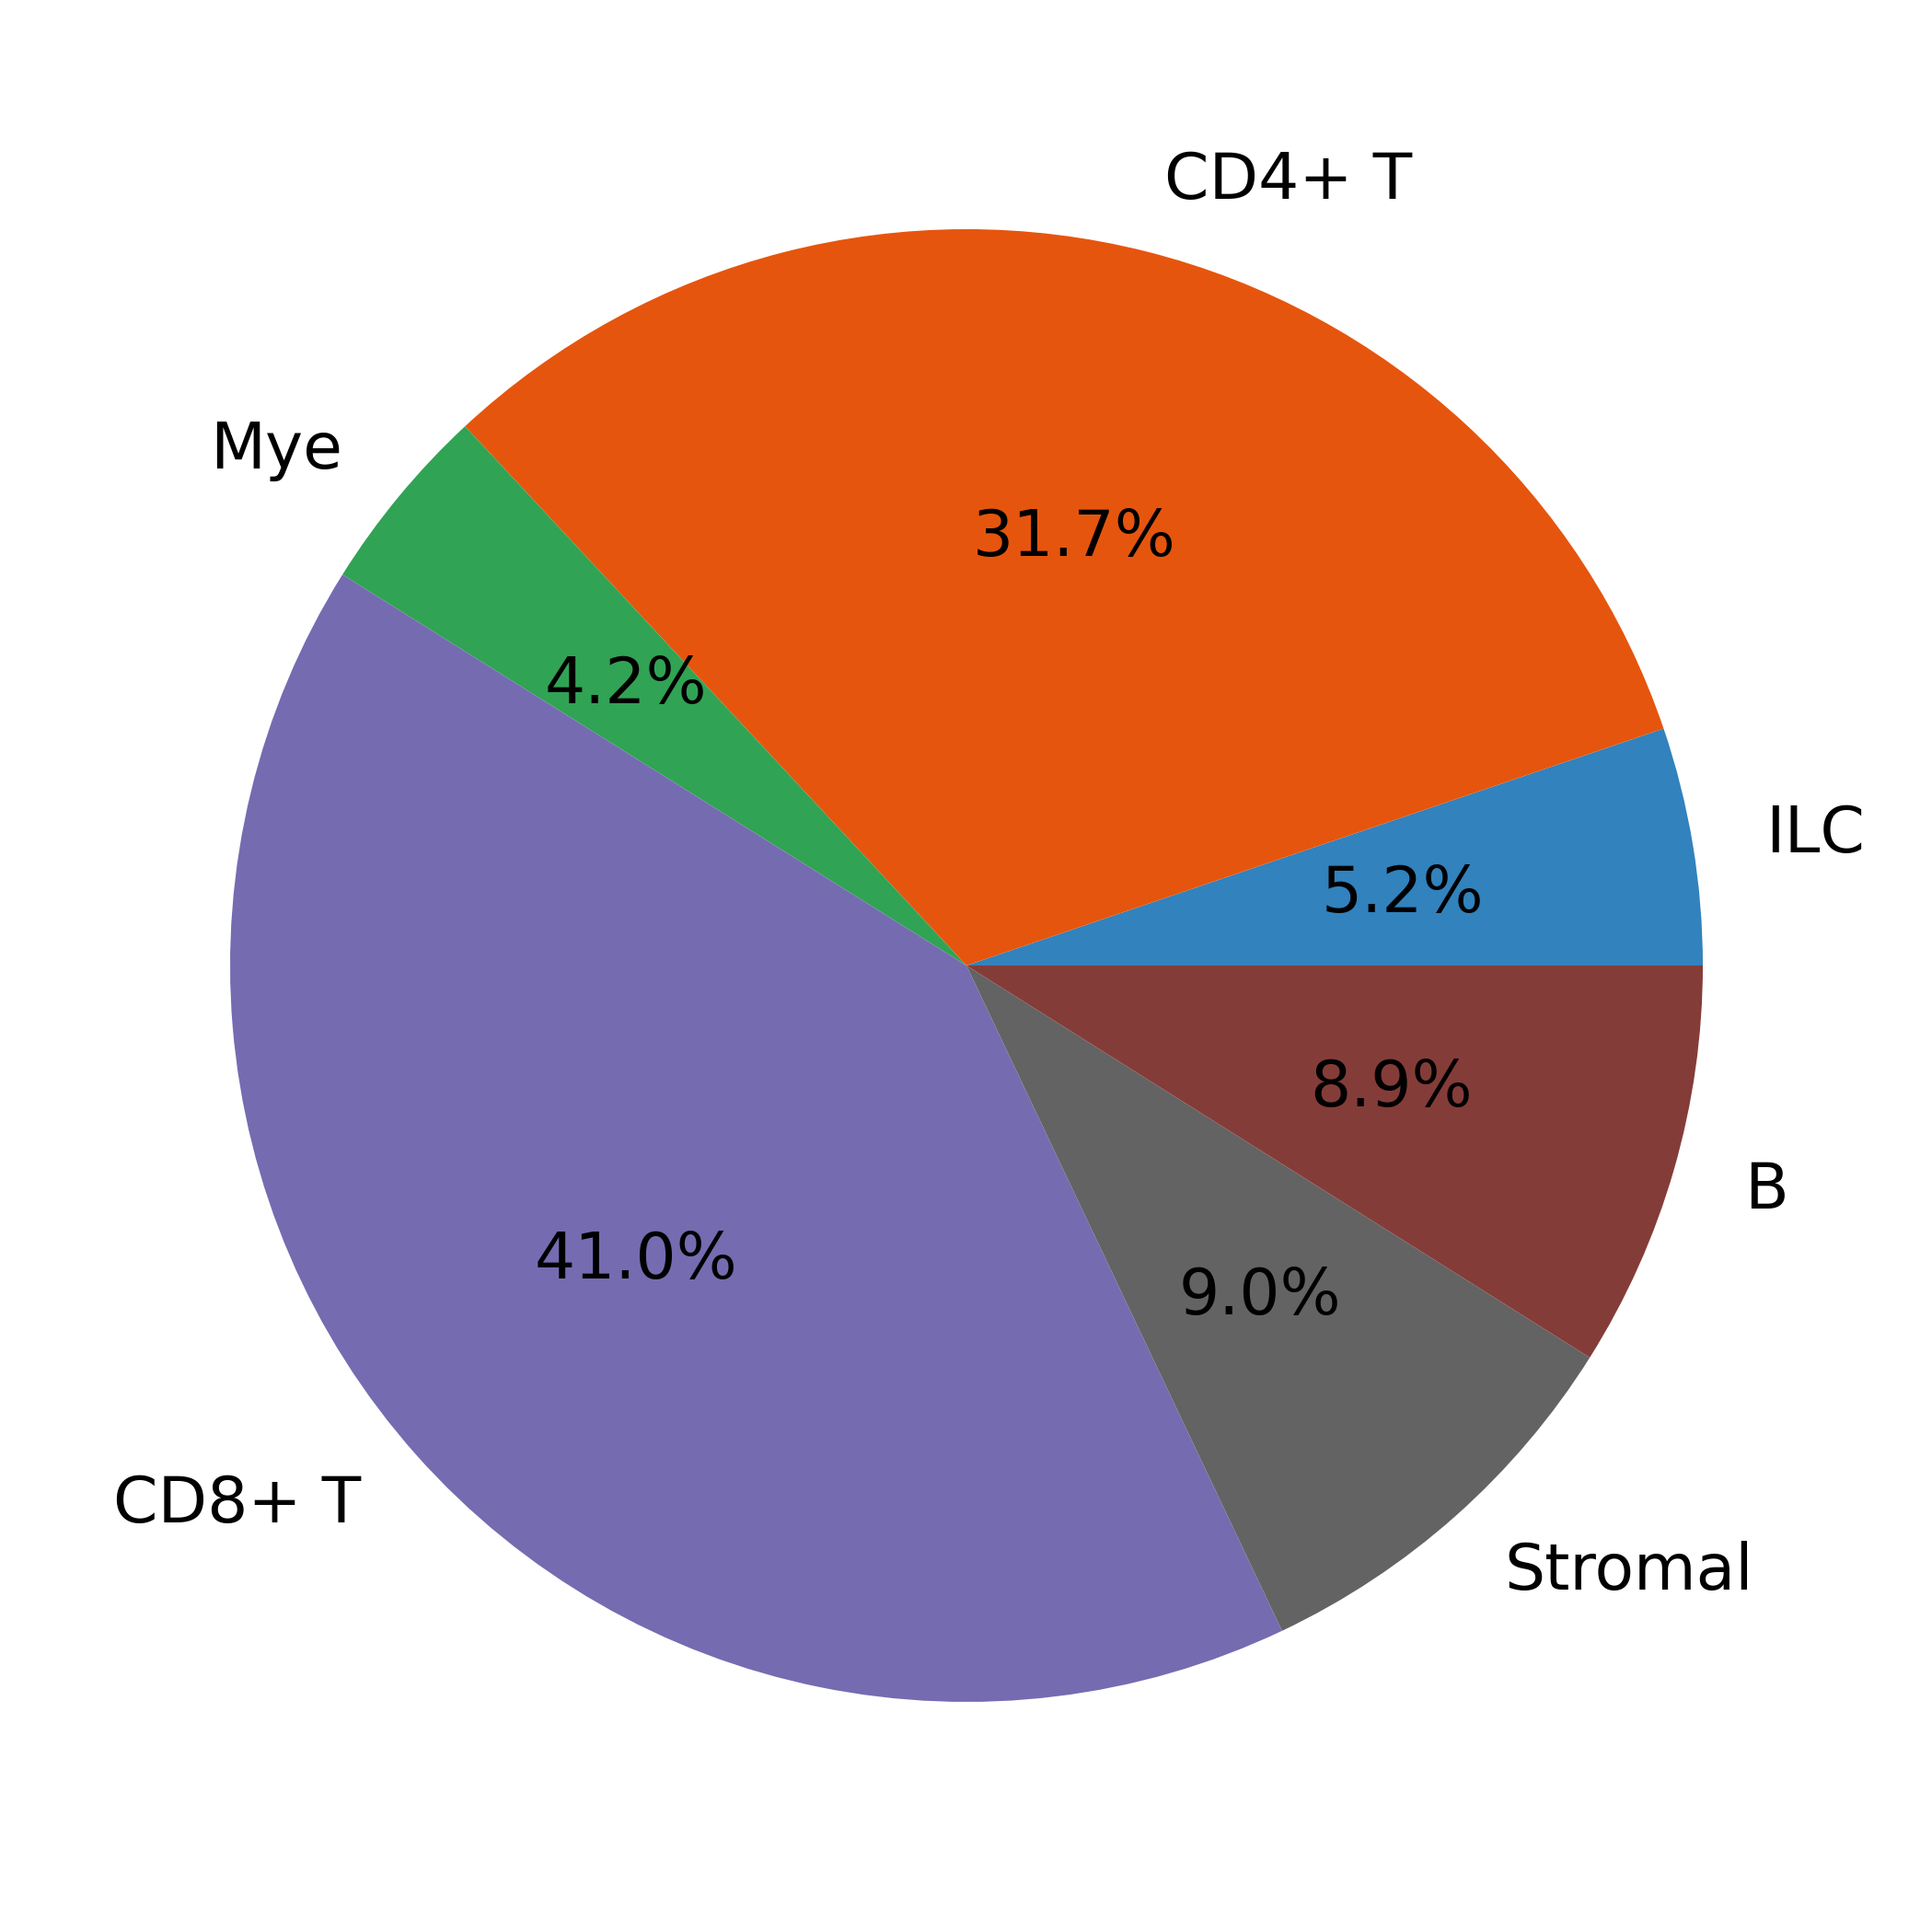

In [154]:
CellTypeProportion_C_ByMSIClass = list()

for MSI_class, edf in CellTypeProportion_C[(CellTypeProportion_C['BiopsySite']=='Tumor')].groupby('MSI_class', observed=True):
    dict_CellType_to_Count = { CellType : 0 for CellType in set(CellTypeProportion_C['BroadCellType']) }
    for CellType, edf2 in edf.groupby('BroadCellType', observed=True):
        dict_CellType_to_Count[CellType] = sum(edf2['Count'])
    
    TotalCounts = sum(dict_CellType_to_Count.values())
    for CellType, Count in dict_CellType_to_Count.items():
        CellTypeProportion_C_ByMSIClass.append( [MSI_class, CellType, Count, Count/TotalCounts] )

CellTypeProportion_C_ByMSIClass = pd.DataFrame(CellTypeProportion_C_ByMSIClass, columns=['MSI_class', 'BroadCellType', 'Count', 'Proportion'])

MSI_class_oi = 'MSI-H'
# ['ILC', 'CD4+ T', 'Mye', 'T', 'CD8+ T', 'Stromal', 'B']
palette_oi = sns.color_palette('tab20c',)+sns.color_palette('tab20b',)[12:16]
dict_MSI_class_to_palette={
    'MSI-H' : [palette_oi[0], palette_oi[4], palette_oi[8], palette_oi[12], palette_oi[16], palette_oi[20]],
    'MSI-I' : [palette_oi[1], palette_oi[5], palette_oi[9], palette_oi[13], palette_oi[17], palette_oi[21]],
    'MSI-L' : [palette_oi[2], palette_oi[6], palette_oi[10], palette_oi[14], palette_oi[18], palette_oi[22]],
}

fig, ax = plt.subplots(figsize=(4, 4), dpi=500)
CellTypeProportion_C_ByMSIClass_oi = CellTypeProportion_C_ByMSIClass[(CellTypeProportion_C_ByMSIClass['MSI_class']==MSI_class_oi)]
ax.pie(CellTypeProportion_C_ByMSIClass_oi['Proportion'], 
       labels=CellTypeProportion_C_ByMSIClass_oi['BroadCellType'], 
       autopct='%1.1f%%', 
       colors=dict_MSI_class_to_palette[MSI_class_oi]
       )
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig(f'/node200data/18parkky/datasets/data/public/processed_data/CRC_MSI_intensity_analysis/TME_analysis/{MSI_class_oi}.Chen.BroadAbundance_piechart.png', transparent=True, ) 

#### Joanito

In [164]:
dict_AuthorCellTypeLvl1b_to_Broad = {
    'CD4+ T' : 'CD4+ T',
    'CD8+ T' : 'CD8+ T',
    'Endothelial' : 'Stromal',
    'Fibroblast' : 'Stromal',
    'GC B' : 'B',
    'Glial' : 'Stromal',
    'IGHA+ Plasma' : 'B',
    'IGHG+ Plasma' : 'B',
    'ILC' : 'ILC',
    'Macrophage' : 'Myeloid',
    'Mast' : 'Myeloid',
    'Memory B' : 'B',
    'Monocyte' : 'Myeloid',
    'NK' : 'ILC',
    'Naive B' : 'B',
    'Pericyte' : 'Stromal',
    'SMC' : 'Stromal',
    'cDC' : 'Myeloid',
    'gd T' : 'CD8+ T',
    'pDC' : 'Myeloid',
}

CellTypeProportion_J['BroadCellType']=[dict_AuthorCellTypeLvl1b_to_Broad[ACT] for ACT in CellTypeProportion_J['CellType']]

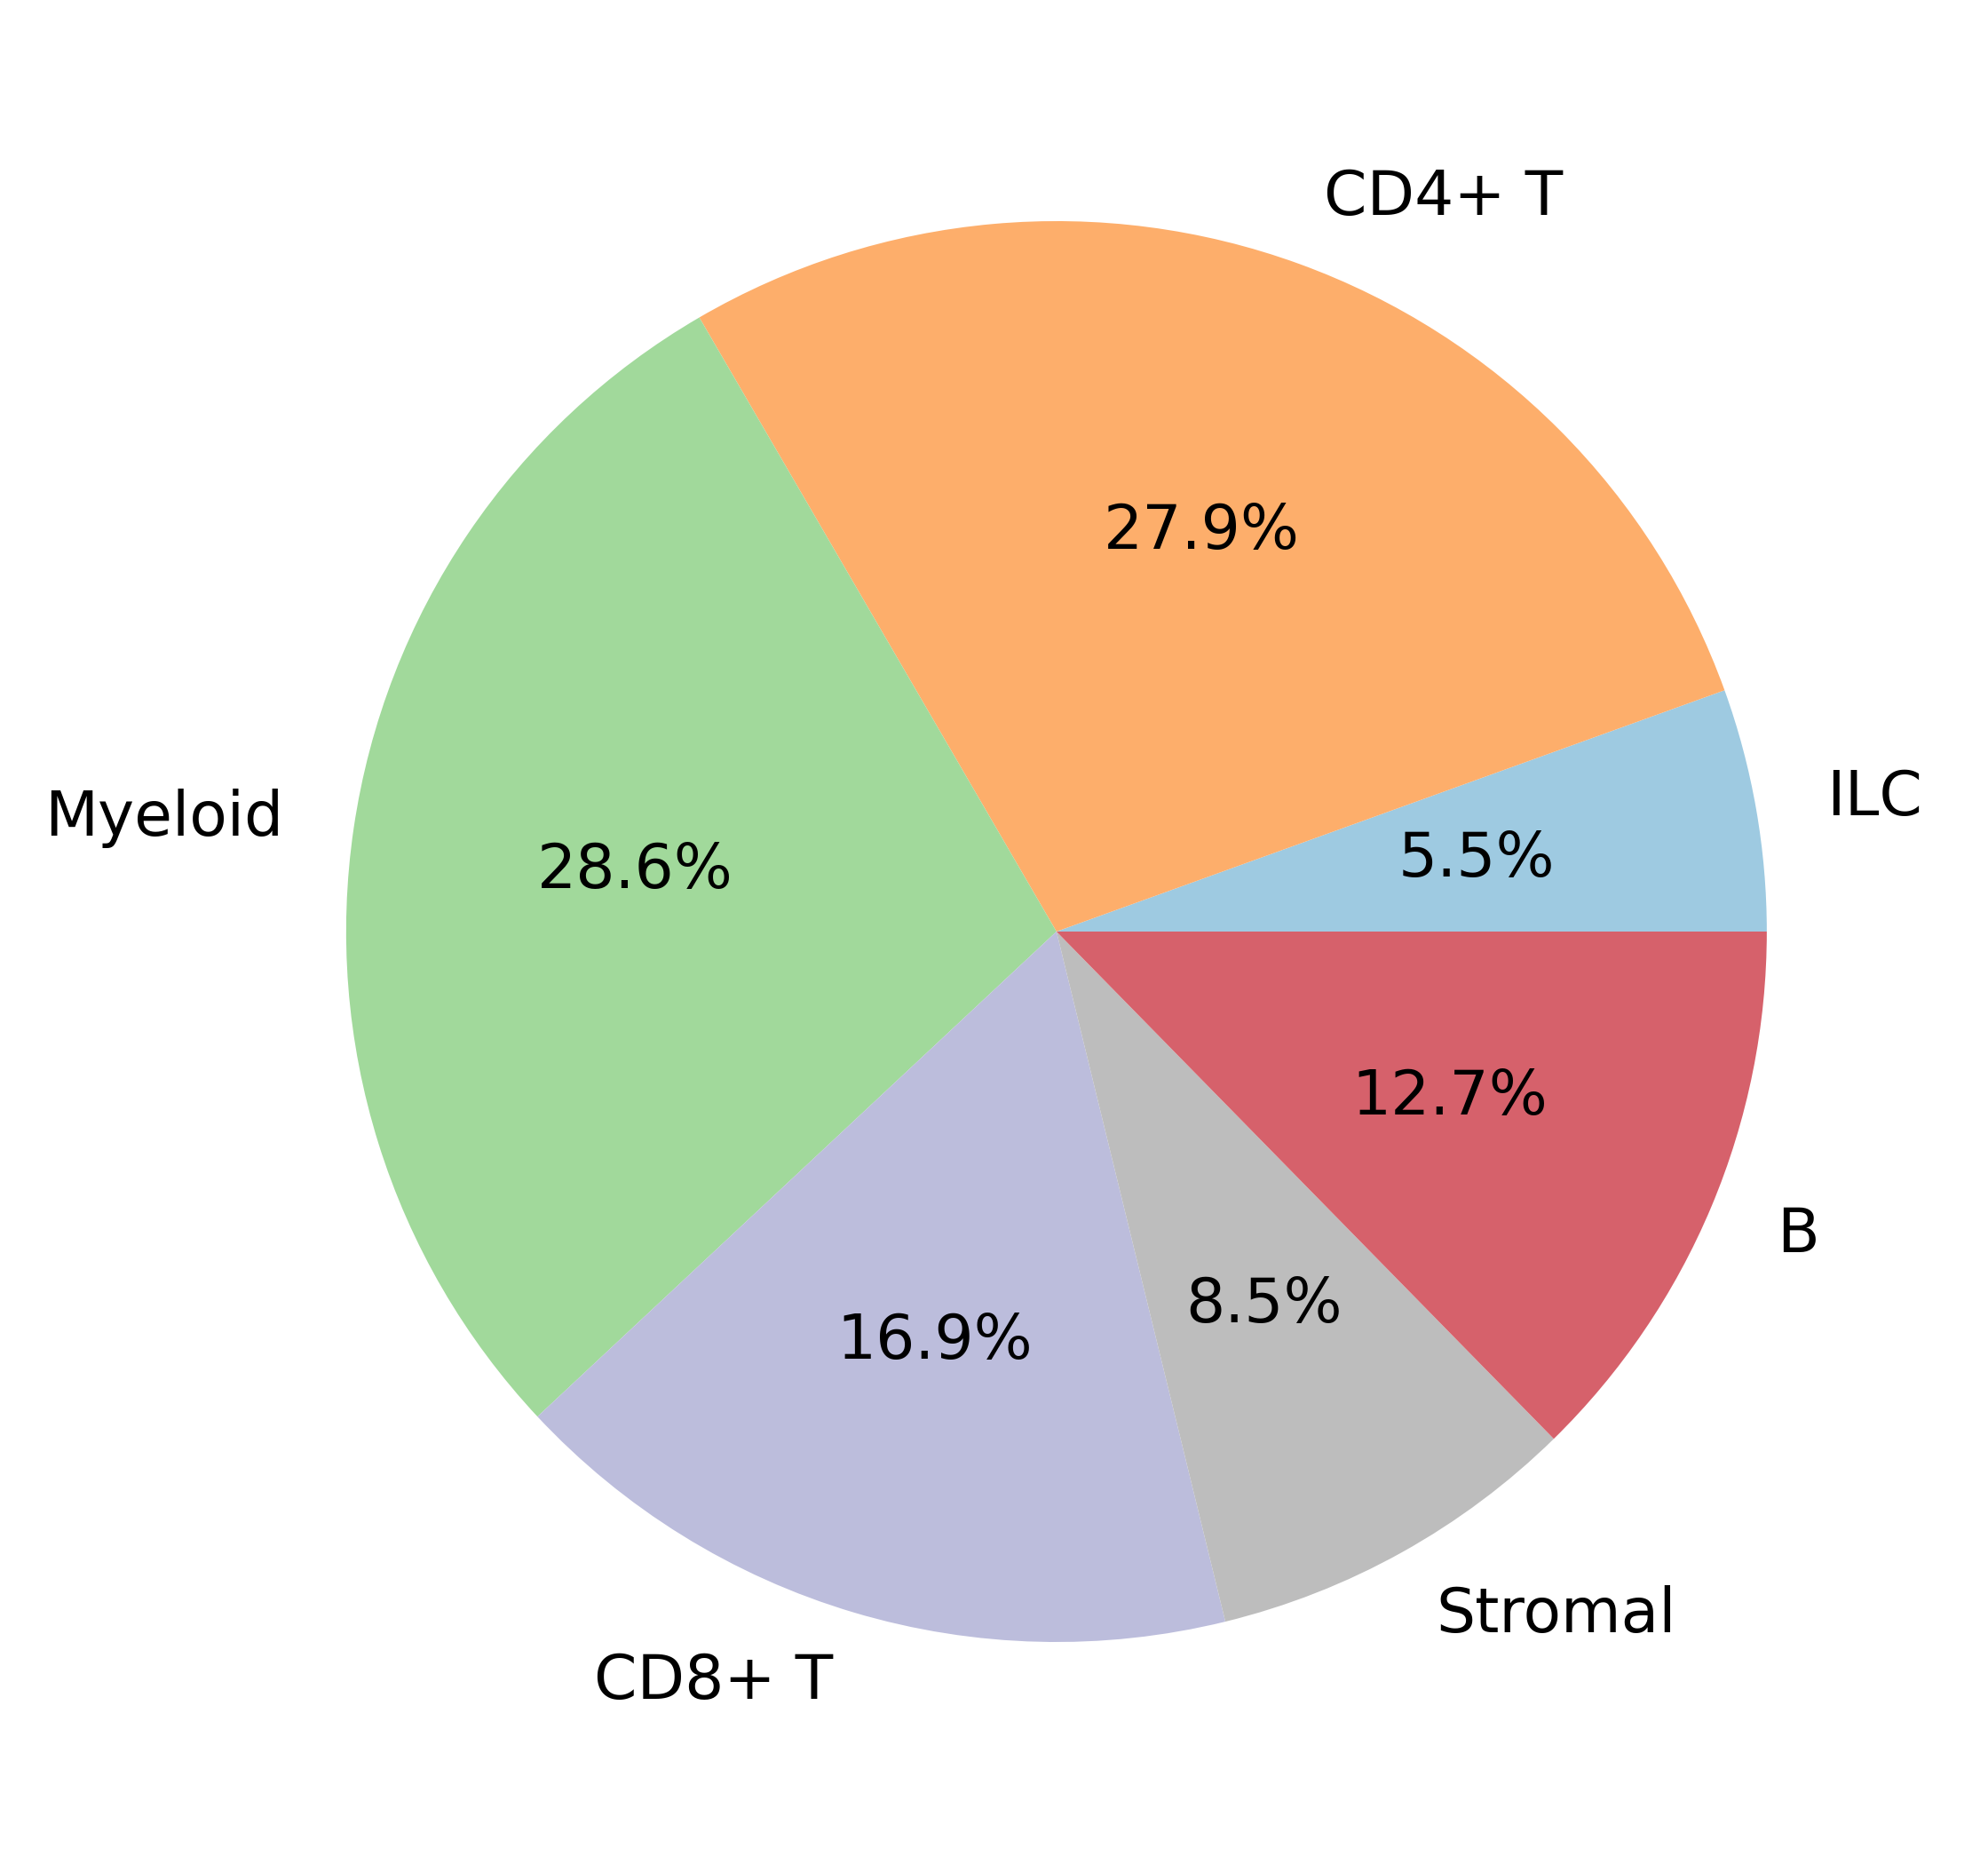

In [173]:
CellTypeProportion_J_ByMSIClass = list()

for MSI_class, edf in CellTypeProportion_J[(CellTypeProportion_J['BiopsySite']=='Tumor')].groupby('MSI_class', observed=True):
    dict_CellType_to_Count = { CellType : 0 for CellType in set(CellTypeProportion_J['BroadCellType']) }
    for CellType, edf2 in edf.groupby('BroadCellType', observed=True):
        dict_CellType_to_Count[CellType] = sum(edf2['Count'])
    
    TotalCounts = sum(dict_CellType_to_Count.values())
    for CellType, Count in dict_CellType_to_Count.items():
        CellTypeProportion_J_ByMSIClass.append( [MSI_class, CellType, Count, Count/TotalCounts] )

CellTypeProportion_J_ByMSIClass = pd.DataFrame(CellTypeProportion_J_ByMSIClass, columns=['MSI_class', 'BroadCellType', 'Count', 'Proportion'])

MSI_class_oi = 'MSI-L'
# ['ILC', 'CD4+ T', 'Mye', 'T', 'CD8+ T', 'Stromal', 'B']
palette_oi = sns.color_palette('tab20c',)+sns.color_palette('tab20b',)[12:16]
dict_MSI_class_to_palette={
    'MSI-H' : [palette_oi[0], palette_oi[4], palette_oi[8], palette_oi[12], palette_oi[16], palette_oi[20]],
    'MSI-I' : [palette_oi[1], palette_oi[5], palette_oi[9], palette_oi[13], palette_oi[17], palette_oi[21]],
    'MSI-L' : [palette_oi[2], palette_oi[6], palette_oi[10], palette_oi[14], palette_oi[18], palette_oi[22]],
}

fig, ax = plt.subplots(figsize=(4, 4), dpi=500)
CellTypeProportion_J_ByMSIClass_oi = CellTypeProportion_J_ByMSIClass[(CellTypeProportion_J_ByMSIClass['MSI_class']==MSI_class_oi)]
ax.pie(CellTypeProportion_J_ByMSIClass_oi['Proportion'], 
       labels=CellTypeProportion_J_ByMSIClass_oi['BroadCellType'], 
       autopct='%1.1f%%', 
       colors=dict_MSI_class_to_palette[MSI_class_oi]
       )
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig(f'/node200data/18parkky/datasets/data/public/processed_data/CRC_MSI_intensity_analysis/TME_analysis/{MSI_class_oi}.Joanito.BroadAbundance_piechart.png', transparent=True, ) 

## Relationship bewtween [MSI score ↔ Cell-type proportion] & [Sample enrichment] for each cell type

In [8]:
SummarizedInfo_C = getSummarizedInfo(adata_C, CellTypeProportion_C).sort_values('Pvalue')
SummarizedInfo_J = getSummarizedInfo(adata_J[(adata_J.obs['MSI']=='MSI-H')], CellTypeProportion_J).sort_values('Pvalue')
SummarizedInfo_C['dataset'] = 'Chen et al'
SummarizedInfo_J['dataset'] = 'Joanito et al'

# print(len(SummarizedInfo_C), len(SummarizedInfo_J))
# IntersectingCellTypes = set(SummarizedInfo_C['CellType']).intersection(set(SummarizedInfo_J['CellType']))
# print(len(IntersectingCellTypes))

# SummarizedInfo_C = SummarizedInfo_C[(SummarizedInfo_C['CellType'].isin(IntersectingCellTypes))].copy()
# SummarizedInfo_J = SummarizedInfo_J[(SummarizedInfo_J['CellType'].isin(IntersectingCellTypes))].copy()

/tmp/ipykernel_298222/2870058325.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dict_PatientID_to_MSI_intensity = { PatientID : np.mean(edf[(edf['Manual_CellType_lvl_2']=='Tumor epithelial')]['MSI_score']) for PatientID, edf in adata.obs.groupby('PatientID', ) }


{'P04': 6.600170215466162, 'P15': 3.2800240611752773, 'P17': 2.163172775984861, 'P18': 1.2597684018086597, 'P19': 3.424761624148185, 'P20': 3.320250707611496, 'P21': 5.228585165446596, 'P22': 4.473529075630034, 'P23': 4.818777140883732, 'P26': 3.2527255511957964}
{'CRC2783': 3.4826712446629693, 'CRC2817': 0.9021030760718651, 'SC035': 4.069933206315948, 'SC044': 7.617198034919111}


/tmp/ipykernel_298222/2870058325.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dict_PatientID_to_MSI_intensity = { PatientID : np.mean(edf[(edf['Manual_CellType_lvl_2']=='Tumor epithelial')]['MSI_score']) for PatientID, edf in adata.obs.groupby('PatientID', ) }


In [992]:
d = {'P04': 6.600170215466162, 'P15': 3.2800240611752773, 'P17': 2.163172775984861, 'P18': 1.2597684018086597, 'P19': 3.424761624148185, 'P20': 3.320250707611496, 'P21': 5.228585165446596, 'P22': 4.473529075630034, 'P23': 4.818777140883732, 'P26': 3.2527255511957964}
list(dict(sorted(d.items(), key=lambda x:x[1])).keys())

['P18', 'P17', 'P26', 'P15', 'P20', 'P19', 'P22', 'P23', 'P21', 'P04']

In [9]:
TherapeuticIdx = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/TherapeuticIdx.S3.tsv', sep='\t', header=None)
TherapeuticIdx.columns = ['Author_CellType', 'TissueEnrichment_Blood', 'TissueEnrichment_Normal', 'TissueEnrichment_Tumor', 
                          'Ti', 'Pi', 
                          'Median_Frequency_at_baseline_CR', 'Median_Frequency_at_baseline_PR', 'Median_Frequency_at_baseline_SD', 
                          'Median_Frequency_at_surgery_CR', 'Median_Frequency_at_surgery_PR', 'Median_Frequency_at_surgery_SD']

dict_AuthorCellType_to_lvl_2b_CellType['c32_DPT'] = 'N/A'

TherapeuticIdx['CellType'] = [ dict_AuthorCellType_to_lvl_2b_CellType[Author_CellType] for Author_CellType in TherapeuticIdx['Author_CellType']]

TumorEnrichment = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/TumorEnrichment.S4.tsv', sep='\t',)
TumorEnrichment.columns = [ 'SubCellType', 'TumorEnrichment' ]

dict_SubCellType_TumorEnrichment = { tup.SubCellType : tup.TumorEnrichment for tup in TumorEnrichment.itertuples() }
for ct in TherapeuticIdx['Author_CellType']:
    try: dict_SubCellType_TumorEnrichment[ct]
    except KeyError: dict_SubCellType_TumorEnrichment[ct] = 0
    
TherapeuticIdx['TumorEnrichment'] = [ dict_SubCellType_TumorEnrichment[Author_CellType] for Author_CellType in TherapeuticIdx['Author_CellType'] ]

dict_CellType_to_TherapeuticInfo = dict()
for CellType, edf in TherapeuticIdx.groupby('CellType', observed=True):
    dict_CellType_to_TherapeuticInfo[CellType] = [np.mean( edf['Ti'] ), np.mean( edf['Pi'] ), np.mean( edf['TumorEnrichment'] ) ]
    
SummarizedInfo_C['Ti'] = [ dict_CellType_to_TherapeuticInfo[CellType][0] for CellType in SummarizedInfo_C['CellType'] ]
SummarizedInfo_C['Pi'] = [ dict_CellType_to_TherapeuticInfo[CellType][1] for CellType in SummarizedInfo_C['CellType'] ]
SummarizedInfo_C['TE'] = [ dict_CellType_to_TherapeuticInfo[CellType][2] for CellType in SummarizedInfo_C['CellType'] ]

0.242 0.15
37


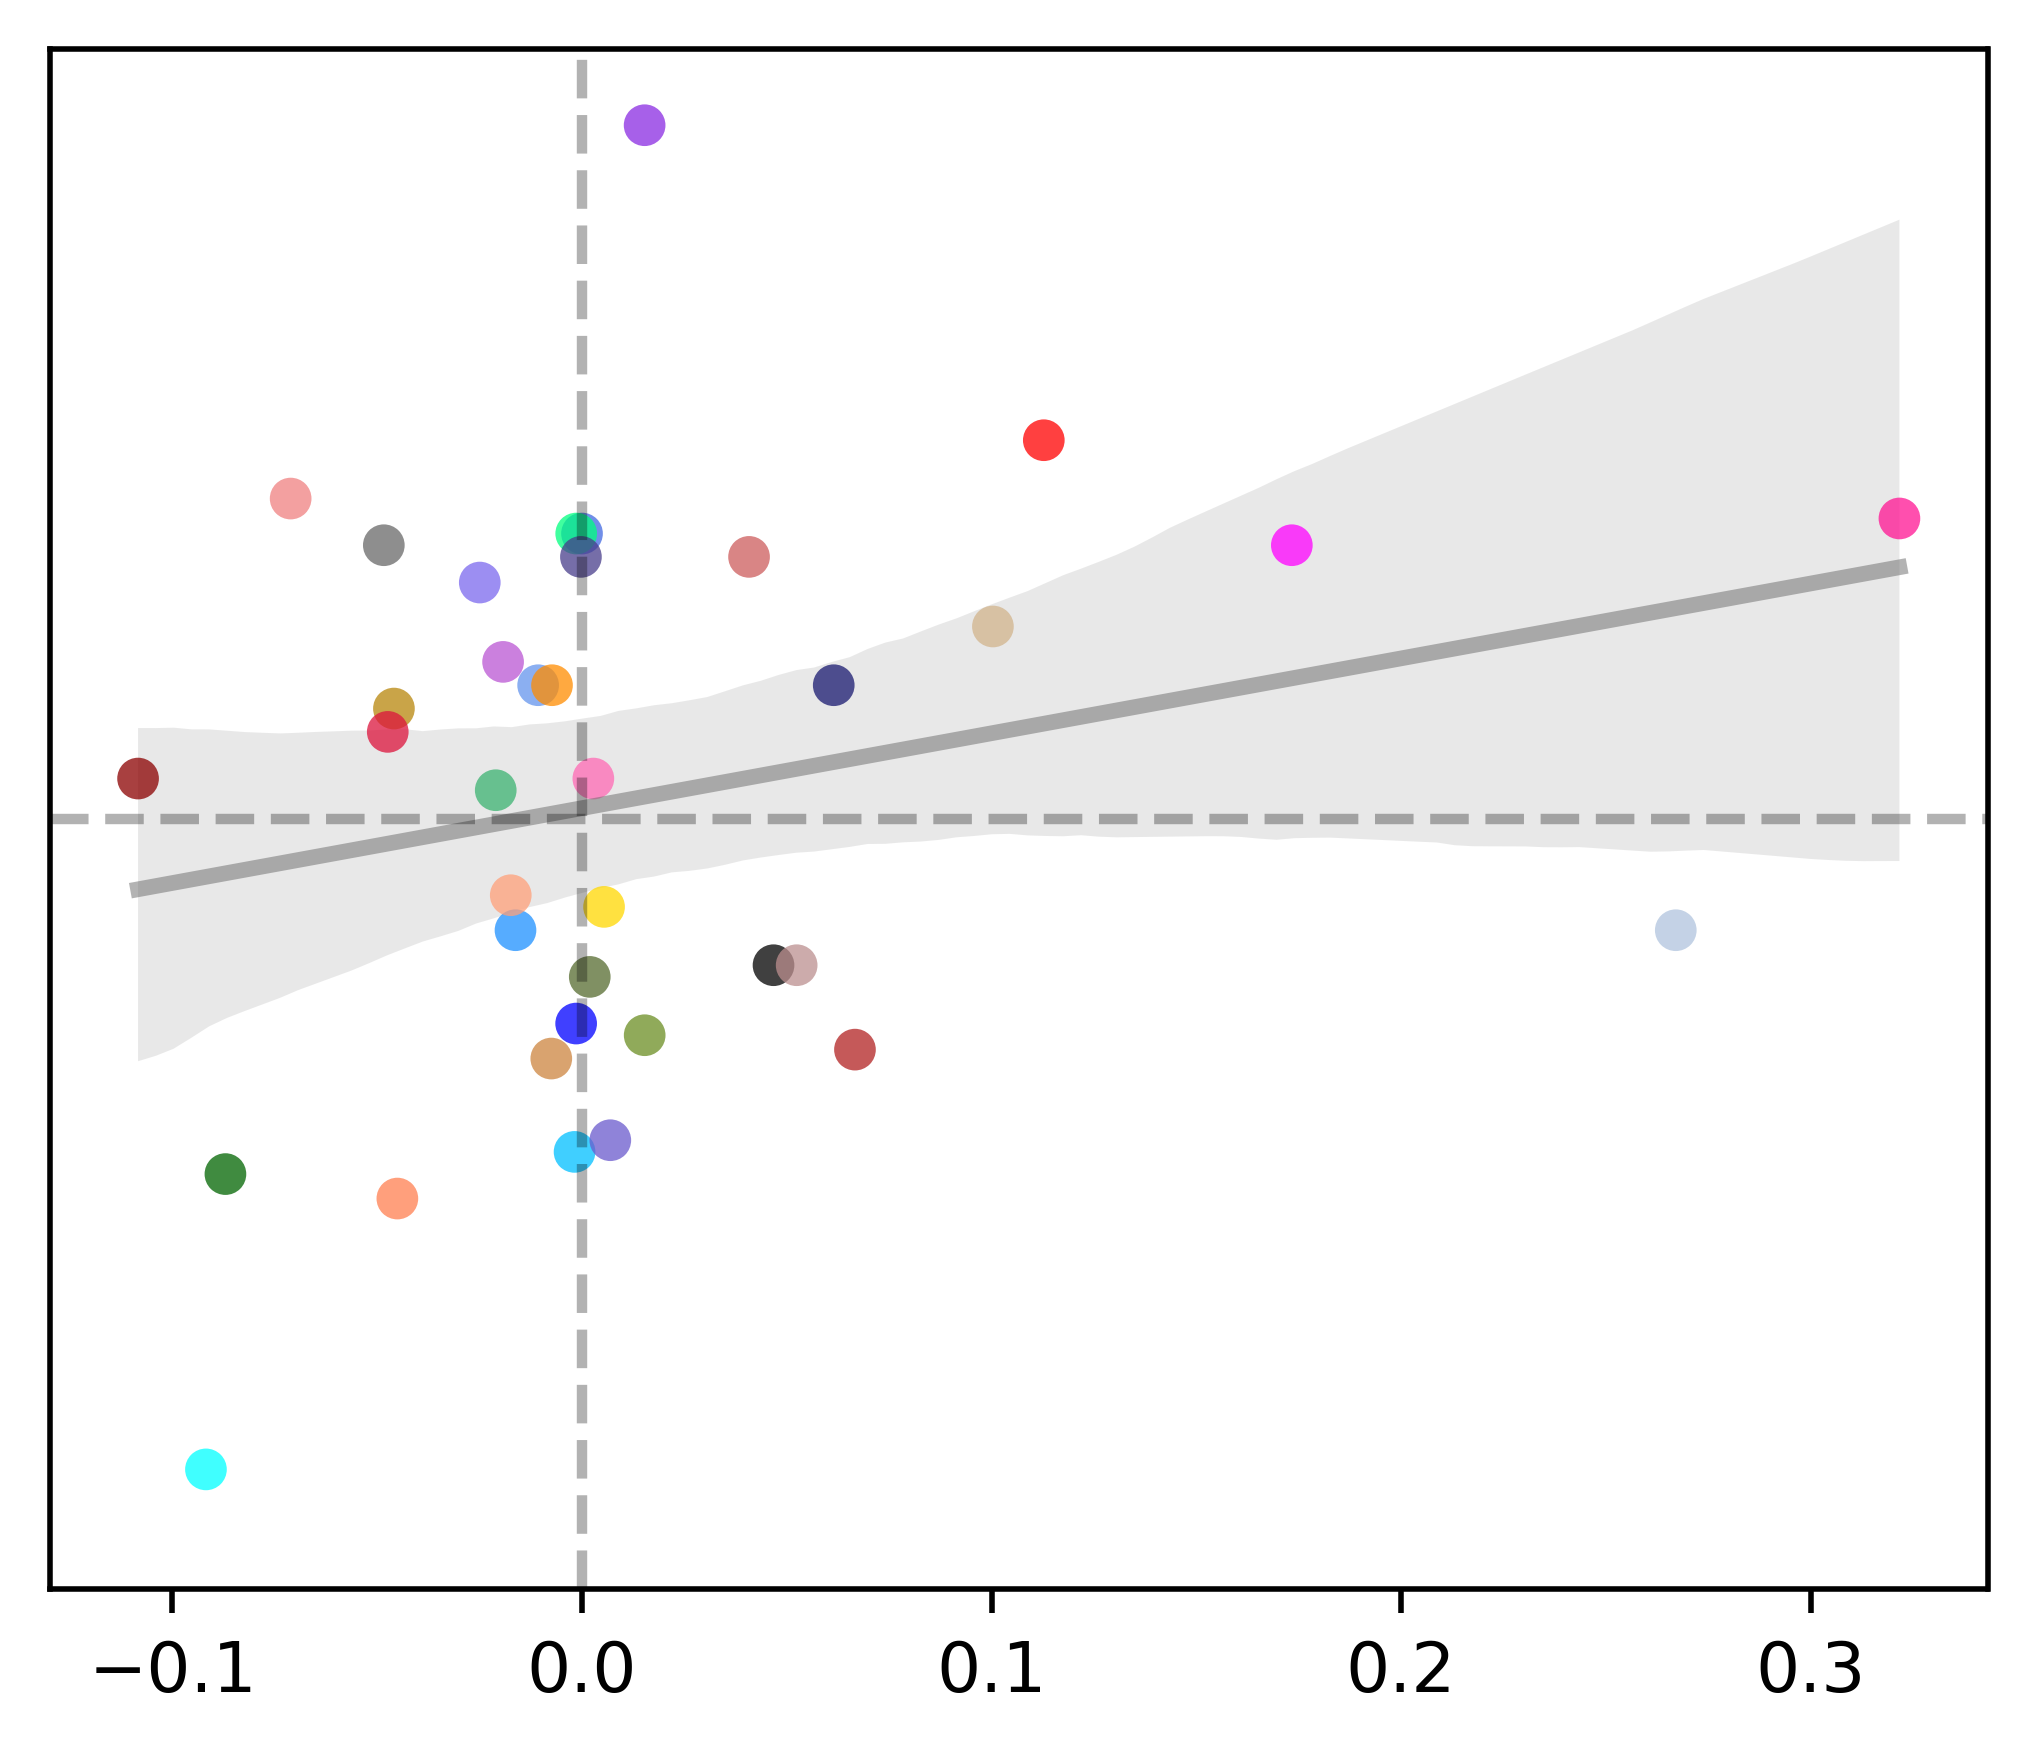

In [16]:
palette_e = {
    'CD4+ Tcm' : 'darkred',
    'CD4+ Temra' : 'firebrick',
    'CD4+ Tfh' : 'red',
    'CD4+ Th1' : 'indianred',
    'CD4+ Th17' : 'lightcoral',
    'CD4+ Tm' : 'coral',
    'CD4+ Tn' : 'lightsalmon',
    'CD4+ Treg' : 'rosybrown',
    'CD4+ Trm' : 'crimson',
    'CD4-CD8- T' : 'hotpink',
    
    'CD8+ IEL' : 'cornflowerblue',
    'CD8+ MAIT' : 'royalblue',
    'CD8+ Proliferating T' : 'midnightblue',
    'CD8+ Tcm' : 'blue',
    'CD8+ Tem' : 'slateblue',
    'CD8+ Temra' : 'darkslateblue',
    'CD8+ Tex' : 'lightsteelblue',
    'CD8+ Tn' : 'dodgerblue',
    'CD8+ Trm' : 'deepskyblue',
    
    'ILC' : 'blueviolet',
    
    'Naive B' : 'peru',
    'Memory B' : 'darkorange',
    'GC B' : 'tan',
    'IGHA+ Plasma' : 'darkgoldenrod',
    'IGHG+ Plasma' : 'gold',
    
    'Endothelial' : 'black',
    'Fibroblast' : 'dimgray',
    
    'Pericyte' : 'magenta',
    'SMC' : 'deeppink',

    'Macrophage' : 'olivedrab',
    'Monocyte' : 'darkgreen',
    'pDC' : 'mediumseagreen',
    'cDC' : 'springgreen',
    'Mast' : 'darkolivegreen',
    'Neutrophil' : 'aqua',

    'Glial' : 'mediumslateblue',
    'γδ2+ T' : 'mediumorchid',
}

plt.figure(figsize=(5, 4), dpi=500)

IndexOfInterest = 'TissueEnrichment'
IndexOfInterest = 'Pi'

ax = sns.regplot(data=SummarizedInfo_C, x=IndexOfInterest, y='CorrelationWithMSI', scatter=None, color='dimgray', 
                 line_kws={'alpha' : 0.5}, 
                 # ci=None,
                 # hue='CellType', alpha=0.75, **{'linewidth':0}, palette=palette_e, legend=True,
                 )
ax = sns.scatterplot(data=SummarizedInfo_C, x=IndexOfInterest, y='CorrelationWithMSI', 
                 hue='CellType', alpha=0.75, **{'linewidth':0}, palette=palette_e, legend=False,
                 )

ax.set_ylim([-0.8, 0.8])
try:
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='',)
except: pass 

r, pval = scipy.stats.pearsonr( SummarizedInfo_C[IndexOfInterest], SummarizedInfo_C['CorrelationWithMSI'] )
print(round(r, 3), round(pval, 3))

ax.set_xlabel('');
ax.set_ylabel('');
# ax.set_xticklabels([]);
ax.set_yticklabels([]);
ax.set_yticks([]);

plt.axhline(0, color='black', ls='--', alpha=0.3)
plt.axvline(0, color='black', ls='--', alpha=0.3)
print(len(palette_e))

### Final dataframe

In [770]:
SummarizedInfo_J.columns

Index(['CellType', 'TissueEnrichment', 'CorrelationWithMSI', 'Pvalue',
       'n_patients', 'dataset'],
      dtype='object')

In [973]:
dict_CellType_to_Info = dict()
for tup in SummarizedInfo_J.itertuples():
    dict_CellType_to_Info[tup.CellType] = [ tup.TissueEnrichment, tup.CorrelationWithMSI, tup.Pvalue, tup.n_patients ]
for tup in SummarizedInfo_C.itertuples():
    dict_CellType_to_Info[tup.CellType].append( tup.TissueEnrichment )
    dict_CellType_to_Info[tup.CellType].append( tup.CorrelationWithMSI )
    dict_CellType_to_Info[tup.CellType].append( tup.Pvalue )
    dict_CellType_to_Info[tup.CellType].append( tup.n_patients )
    
final_df = pd.DataFrame.from_dict(dict_CellType_to_Info, orient='index')
final_df.reset_index(inplace=True, )
final_df.columns = ['CellType', 
                    'TissueEnrichment_J', 'CorrelationWithMSI_J', 'pval_J', 'n_J', 
                    'TissueEnrichment_C', 'CorrelationWithMSI_C', 'pval_C', 'n_C',]
final_df.head(2)

,CellType,TissueEnrichment_J,CorrelationWithMSI_J,pval_J,n_J,TissueEnrichment_C,CorrelationWithMSI_C,pval_C,n_C
0,Macrophage,1.875141,-1.0,0.0,4.0,3.458971,-0.224242,0.533401,10.0
1,ILC,-1.054797,-0.8,0.2,4.0,1.662385,0.721212,0.018573,10.0


In [985]:
len(set(CellTypeProportion_C['CellType']))

37

In [836]:
palette_e = {
    'CD4+ T' : 'tomato',
    'CD8+ T' : 'crimson',
    'gd T' : 'lightcoral',
    'NK' : 'darkgoldenrod',
    'ILC' : 'gold',
    
    'Endothelial' : 'chocolate',
    'Fibroblast' : 'darkorange',
    'Pericyte' : 'navajowhite',
    'SMC' : 'saddlebrown',

    'Glial' : 'dimgrey',

    'Naive B' : 'darkslategrey',
    'GC B' : 'steelblue',
    'Memory B' : 'deepskyblue',
    'IGHA+ Plasma' : 'indigo',
    'IGHG+ Plasma' : 'mediumslateblue',
    
    'Macrophage' : 'yellowgreen',
    'Monocyte' : 'darkolivegreen',
    'Mast' : 'lawngreen',
    
    'cDC' : 'lightgreen',
    'pDC' : 'darkgreen',
}

0.671 0.002


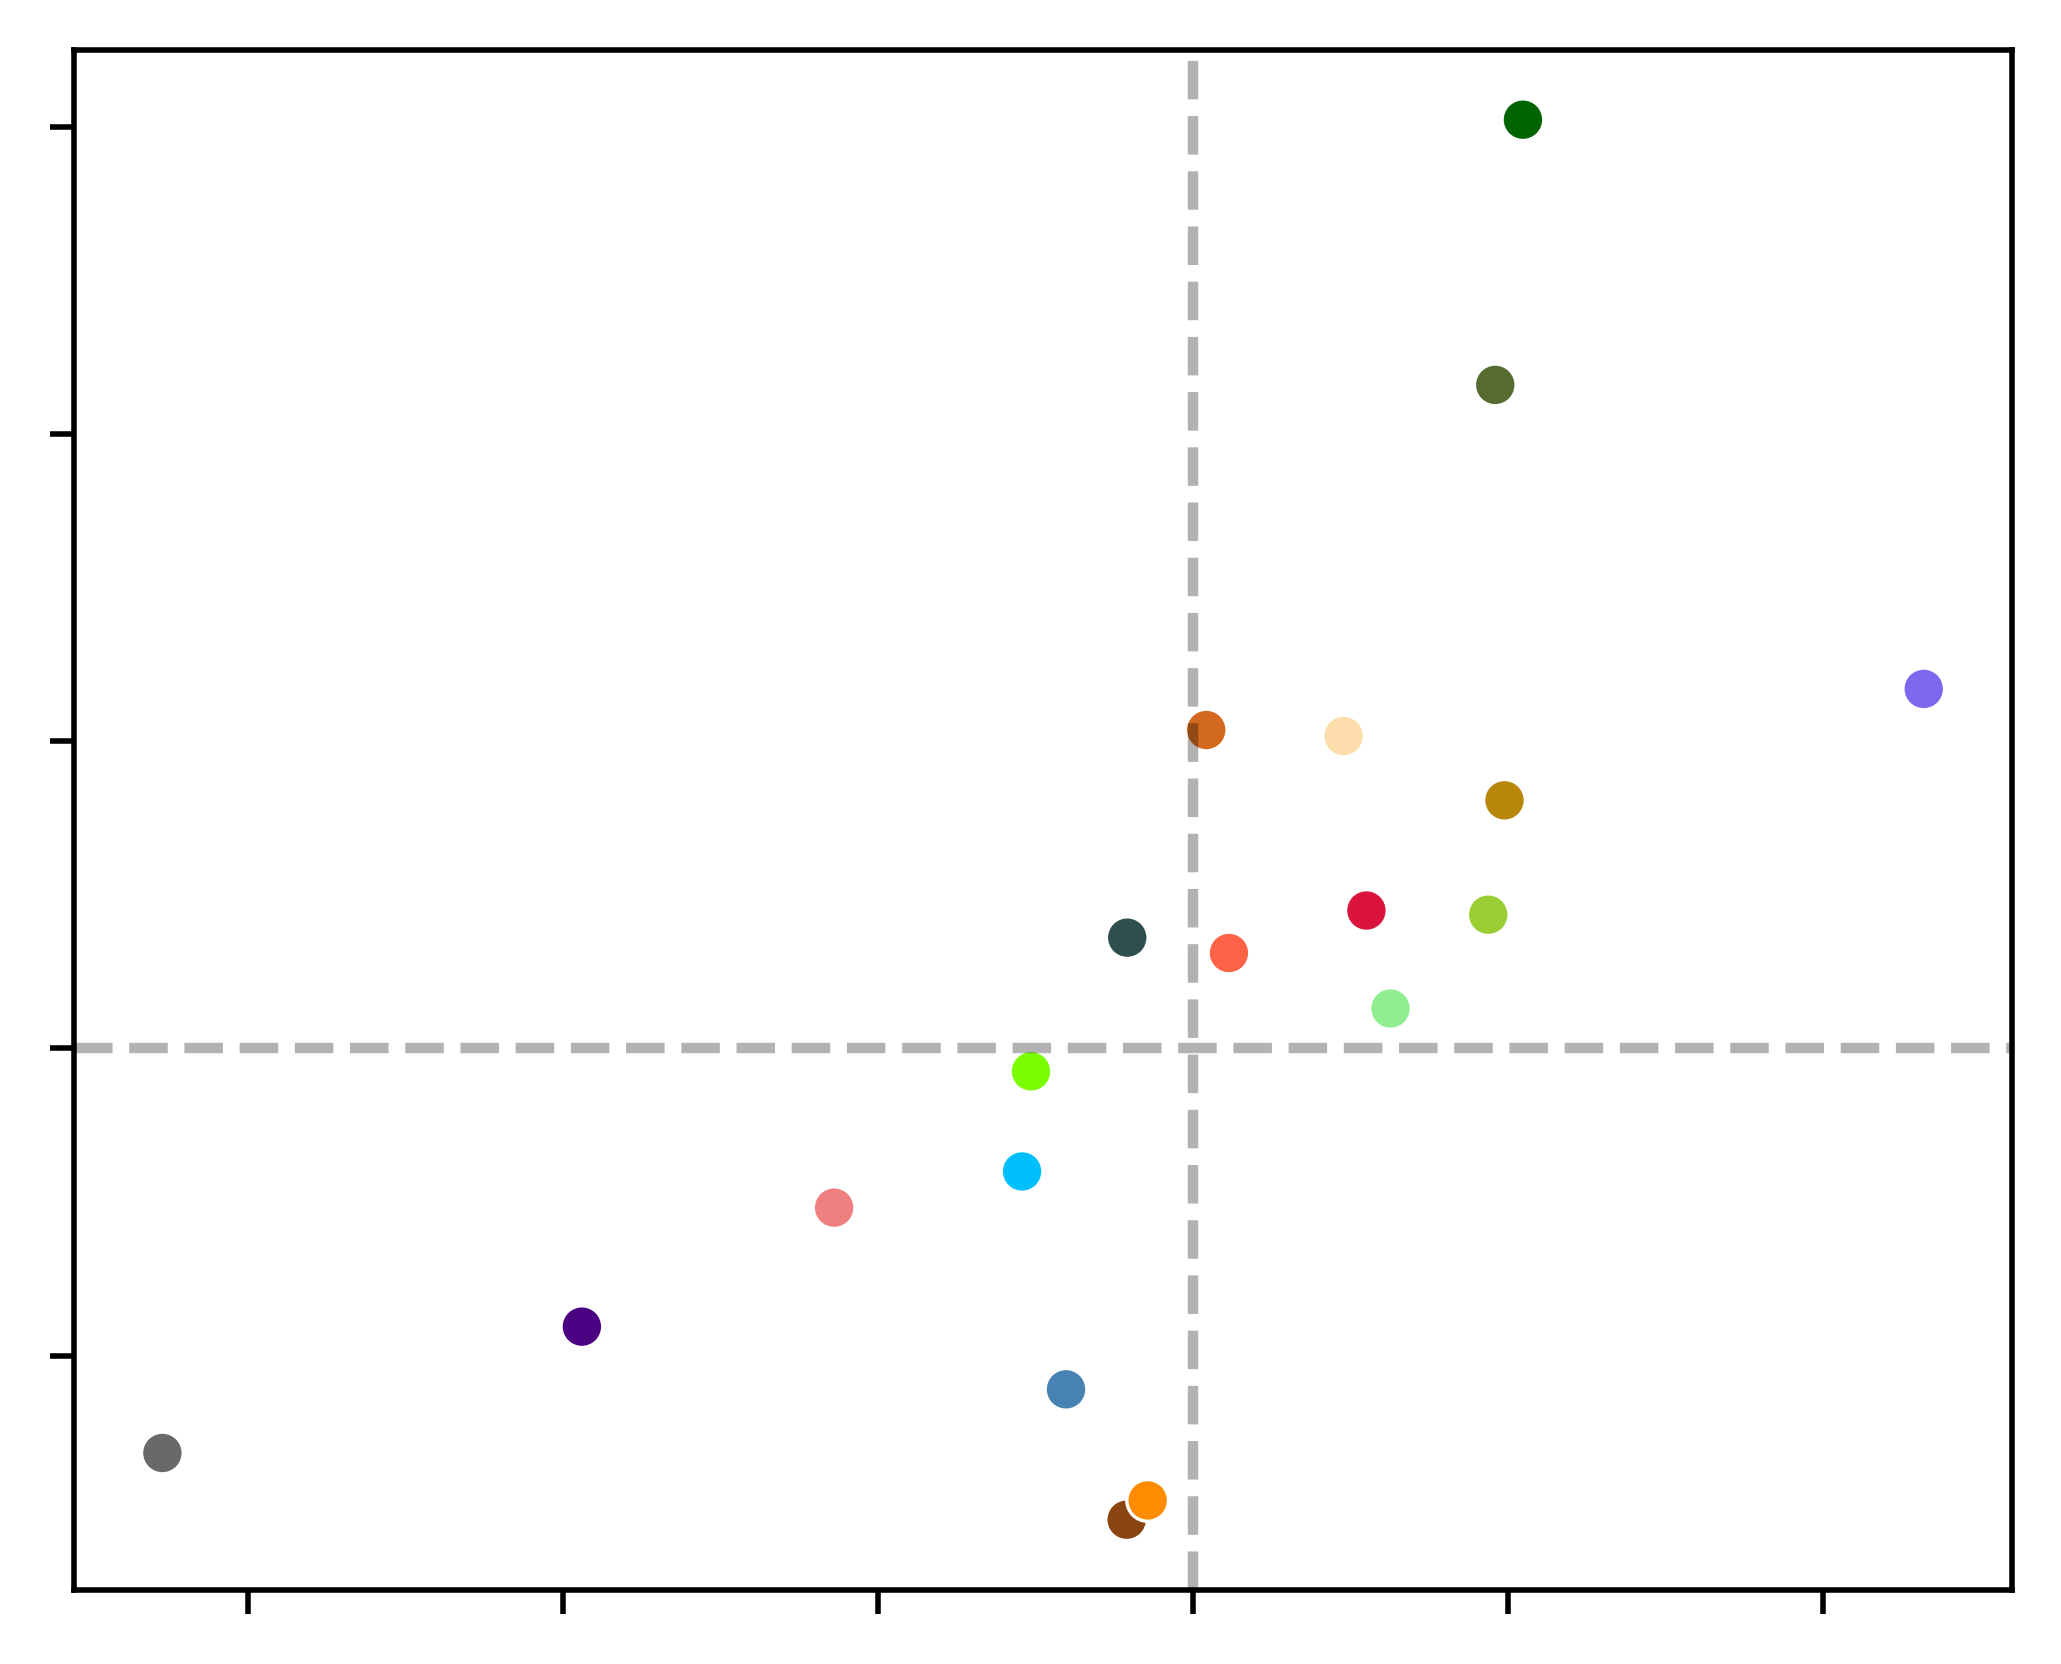

In [885]:
plt.figure(figsize=(5, 4), dpi=500)
ax = sns.scatterplot(data=final_df, x='TissueEnrichment_J', y='TissueEnrichment_C', 
                hue='CellType', legend=None, palette=palette_e,
                )
plt.axhline(0, color='black', ls='--', alpha=0.3)
plt.axvline(0, color='black', ls='--', alpha=0.3)

r, pval = scipy.stats.pearsonr(final_df['TissueEnrichment_C'], final_df['TissueEnrichment_J'])
print(round(r, 3), round(pval, 3))

ax.set_xticklabels([]);
ax.set_yticklabels([]);
ax.set_xlabel('');
ax.set_ylabel('');

In [843]:
chen_patient_order_by_MSI_intensity     = ['P18', 'P17', 'P15', 'P26', 'P20', 'P19', 'P22', 'P23', 'P21', 'P04']
joanito_patient_order_by_MSI_intensity  = ['CRC2817', 'CRC2783', 'SC035', 'SC044']

In [875]:
sc.tl.score_genes(adata_C, ['CD163', 'MRC1', ], score_name='M2_score')
sc.tl.score_genes(adata_J, ['CD163', 'MRC1', ], score_name='M2_score')

<Axes: xlabel='PatientID', ylabel='M2_score'>

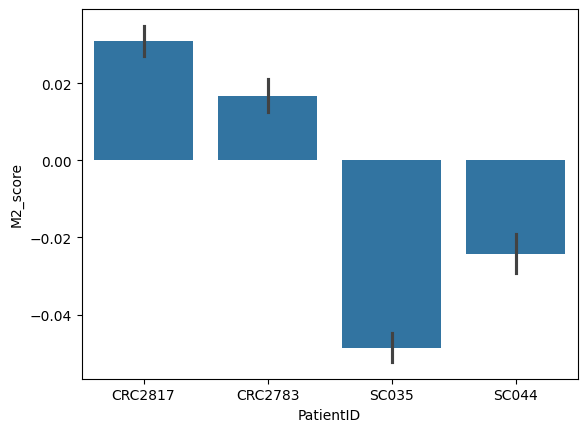

In [877]:
# sc.pl.violin(adata_C, keys='M2_score', groupby='PatientID', order=chen_patient_order_by_MSI_intensity)
# sns.barplot(data=adata_C.obs, y='M2_score', x='PatientID', order=chen_patient_order_by_MSI_intensity)
sns.barplot(data=adata_J.obs, y='M2_score', x='PatientID', order=joanito_patient_order_by_MSI_intensity)

In [ ]:
adata_C[(adata_C.obs['Manual_CellType_lvl_3'].isin(['Macrophage', 'Monocyte']))]

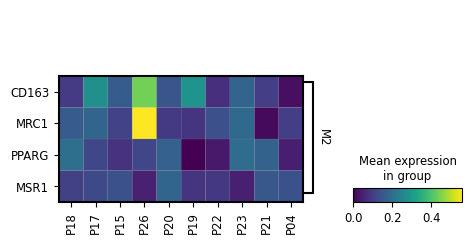

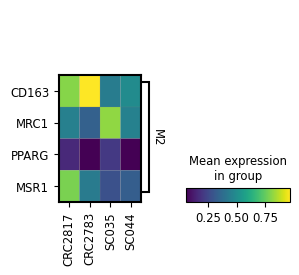

In [880]:
sc.pl.matrixplot(adata_C[(adata_C.obs['Manual_CellType_lvl_3'].isin(['Macrophage', 'Monocyte'])) & (adata_C.obs['BiopsySite']=='Tumor')], 
              # var_names=['NFKB1', 'STAT1', 'TCF7', 'STAT2', 'EOMES', 'PDCD1', 'CTLA4', 'HAVCR2', 'LAG3'], 
              var_names={'M2' : ['CD163', 'MRC1', 'PPARG', 'MSR1'], 
                         # 'Macro' : ['CD74', 'CD68']
                         },
              groupby='PatientID', categories_order=chen_patient_order_by_MSI_intensity, 
              swap_axes=True,
              )

sc.pl.matrixplot(adata_J[(adata_J.obs['Manual_CellType_lvl_3'].isin(['Macrophage', 'Monocyte'])) & 
                      (adata_J.obs['BiopsySite2']=='Tumor') & 
                      (adata_J.obs['MSI']=='MSI-H')], 
              # var_names=['NFKB1', 'STAT1', 'TCF7', 'STAT2', 'EOMES', 'PDCD1', 'CTLA4', 'HAVCR2', 'LAG3'], 
              var_names={'M2' : ['CD163', 'MRC1', 'PPARG', 'MSR1'], 
                         # 'Macro' : ['CD74', 'CD68']
                         },
              groupby='PatientID', categories_order=joanito_patient_order_by_MSI_intensity, 
              swap_axes=True,
              )

0.066 0.787


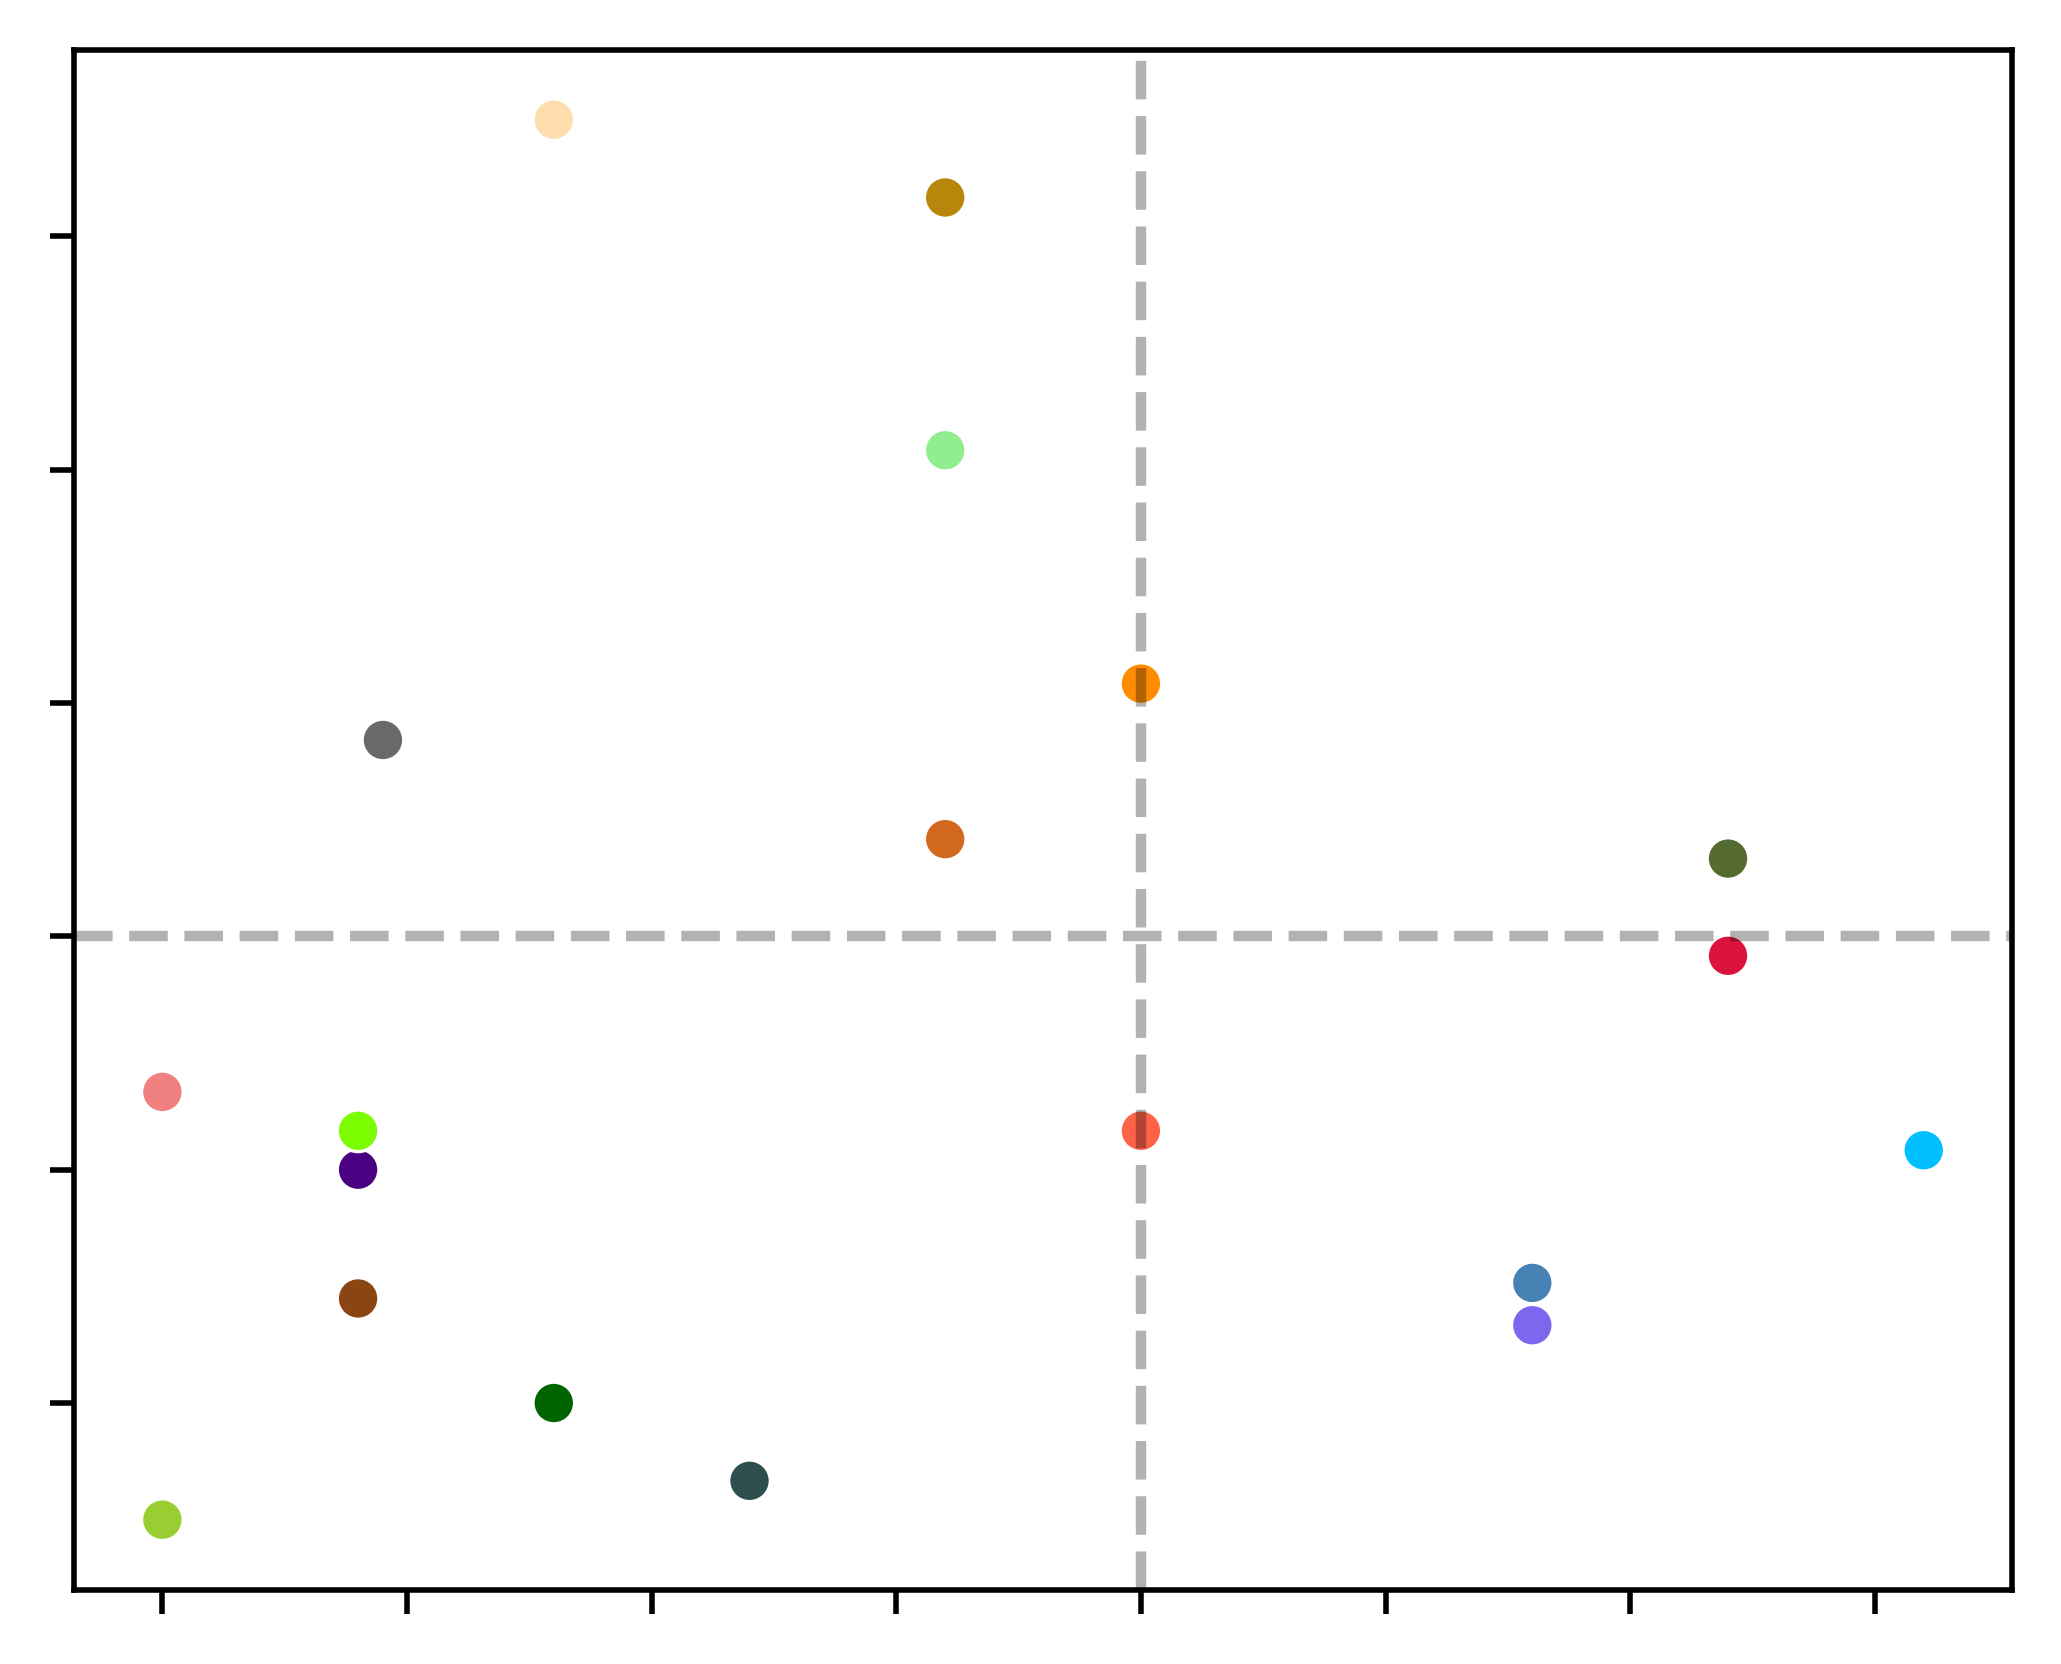

In [889]:
plt.figure(figsize=(5, 4), dpi=500)
ax = sns.scatterplot(data=final_df, x='CorrelationWithMSI_J', y='CorrelationWithMSI_C', 
                hue='CellType', legend=None, palette=palette_e,
                )
try:
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='')
except: pass 

plt.axhline(0, color='black', ls='--', alpha=0.3)
plt.axvline(0, color='black', ls='--', alpha=0.3)

r, pval = scipy.stats.pearsonr(final_df['CorrelationWithMSI_C'], final_df['CorrelationWithMSI_J'])
print(round(r, 3), round(pval, 3))

ax.set_xticklabels([]);
ax.set_yticklabels([]);
ax.set_xlabel('');
ax.set_ylabel('');

In [831]:
final_df.sort_values(['CorrelationWithMSI_J', 'CorrelationWithMSI_C'])[['CellType', 'CorrelationWithMSI_J', 'CorrelationWithMSI_C', 'pval_C', 'pval_J']]

,CellType,CorrelationWithMSI_J,CorrelationWithMSI_C,pval_C,pval_J
0,Macrophage,-1.000000,-0.624242,0.053718,0.000000
1,gd T,-1.000000,0.145897,0.687557,0.000000
4,Mast,-0.800000,-0.163636,0.651477,0.200000
5,SMC,-0.800000,-0.122902,0.735176,0.200000
2,IGHA+ Plasma,-0.800000,0.127273,0.726057,0.200000
6,Glial,-0.774597,0.246070,0.493148,0.225403
8,pDC,-0.600000,-0.018182,0.960240,0.400000
7,Pericyte,-0.600000,0.236364,0.510885,0.400000
11,Naive B,-0.400000,-0.097265,0.789235,0.600000
14,Endothelial,-0.200000,-0.151515,0.676065,0.800000


,CellType,TissueEnrichment_J,CorrelationWithMSI_J,pval_J,n_J,TissueEnrichment_C,CorrelationWithMSI_C,pval_C,n_C
0,Memory B,-1.085166,0.873970,0.000945,4.0,-0.690627,0.139394,0.700932,9.0
1,CD8+ T,1.101520,0.860314,0.001402,4.0,0.829218,-0.006061,0.986743,10.0
2,Monocyte,1.919673,0.860314,0.001402,4.0,5.060956,-0.224242,0.533401,10.0
3,GC B,-0.806196,0.846658,0.002002,4.0,-2.095799,-0.141677,0.696228,3.0
4,IGHG+ Plasma,4.640891,0.846658,0.002002,4.0,2.431534,0.030303,0.933773,10.0
5,CD4+ T,0.228578,0.819346,0.003724,4.0,0.645411,0.151515,0.676065,10.0
6,Fibroblast,-0.287655,0.819346,0.003724,4.0,-3.126437,0.430303,0.214492,10.0
7,Endothelial,0.084439,0.805691,0.004897,4.0,2.123242,-0.151515,0.676065,10.0
8,NK,1.978504,0.805691,0.004897,4.0,1.690273,0.733333,0.015801,10.0
9,cDC,1.254522,0.805691,0.004897,4.0,0.301900,0.442424,0.200423,10.0


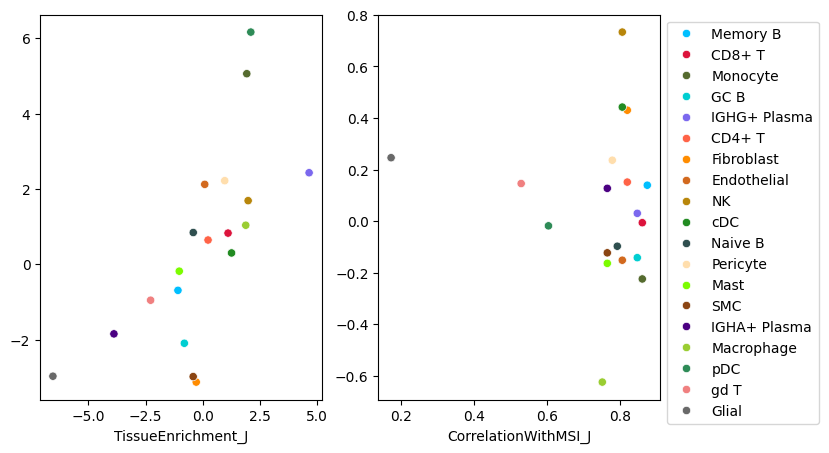

In [783]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
ax = sns.scatterplot(data=final_df, x='TissueEnrichment_J', y='TissueEnrichment_C',
                hue='CellType', legend=None, palette=palette_e,
                ax=axes[0], 
                )
ax.set_ylabel('')

ax = sns.scatterplot(data=final_df, x='CorrelationWithMSI_J', y='CorrelationWithMSI_C', 
                hue='CellType', legend=True, palette=palette_e,
                ax=axes[1], 
                )
ax.set_ylabel('')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='')

final_df

In [750]:
# sc.tl.score_genes(adata_C, gene_list=['TNF', 'IL1B', 'IL6', 'CXCL8', 'NOS2', 'C3', 'NFKB1', 'STAT1'], 
#                   score_name='Antimicrobial activity')
# sc.tl.score_genes(adata_J, gene_list=['TNF', 'IL1B', 'IL6', 'CXCL8', 'NOS2', 'C3', 'NFKB1', 'STAT1'], 
#                   score_name='Antimicrobial activity')
sc.tl.score_genes(adata_C, gene_list=['S100A6', 'S100A10', ], 
                  score_name='Antimicrobial activity')
sc.tl.score_genes(adata_J, gene_list=['S100A6', 'S100A10', ], 
                  score_name='Antimicrobial activity')  

KeyboardInterrupt: 

In [703]:
chen_patient_order_by_MSI_intensity     = ['P18', 'P17', 'P15', 'P26', 'P20', 'P19', 'P22', 'P23', 'P21', 'P04']
joanito_patient_order_by_MSI_intensity  = ['CRC2817', 'CRC2783', 'SC035', 'SC044']

/tmp/ipykernel_180379/3056466334.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dict_PatientID_to_MSI_intensity = { PatientID : np.mean(edf[(edf['Manual_CellType_lvl_2']=='Tumor epithelial')]['MSI_score']) for PatientID, edf in adata_J.obs.groupby('PatientID', ) }


CD8+ T 0.0 1.0
CD4+ T -0.8 0.2
NK -0.4 0.6


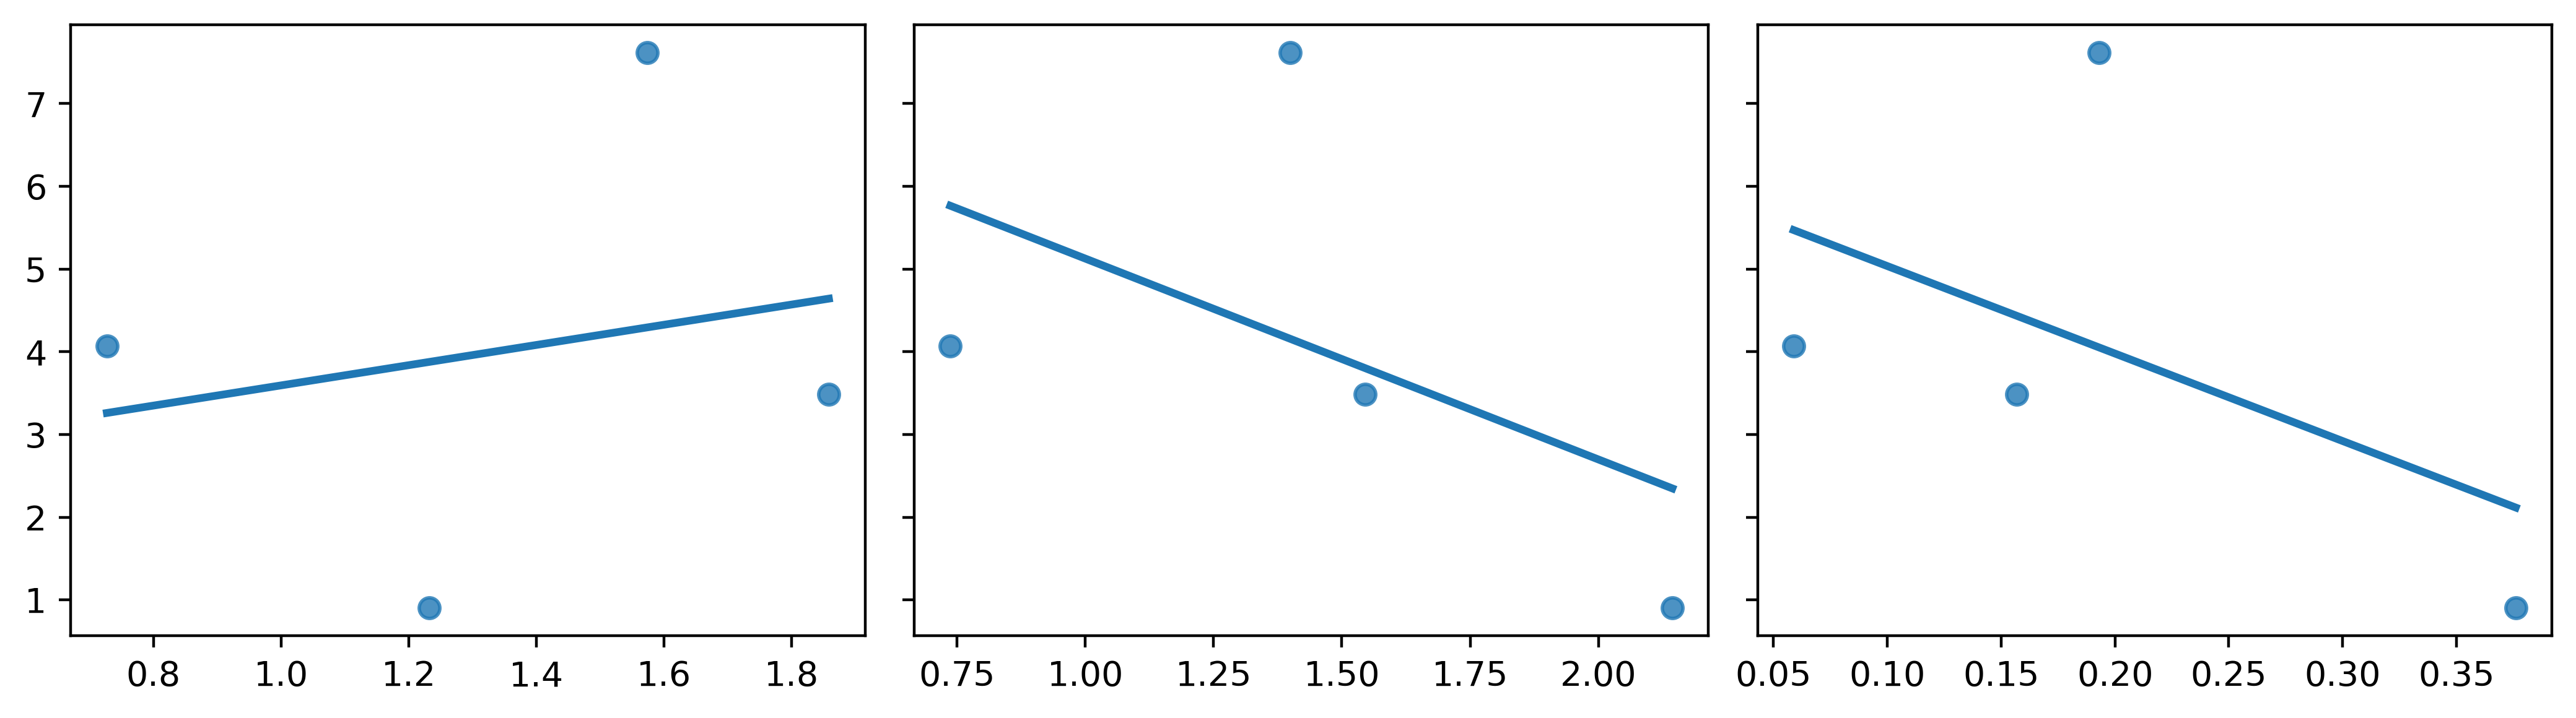

In [726]:
list_PatientID = list(set(CellTypeProportion_J['PatientID']))
dict_PatientID_to_MSI_intensity = { PatientID : np.mean(edf[(edf['Manual_CellType_lvl_2']=='Tumor epithelial')]['MSI_score']) for PatientID, edf in adata_J.obs.groupby('PatientID', ) } 

CellTypes_of_interest = ['CD8+ T', 'CD4+ T', 'NK']
# CellTypes_of_interest = ['Naive B', 'GC B', 'Memory B', 'IGHG+ Plasma', 'IGHA+ Plasma']
# CellTypes_of_interest = ['Monocyte', 'Macrophage', ]
# CellTypes_of_interest = ['cDC', 'pDC',]
# CellTypes_of_interest = ['Fibroblast', 'SOX6+ Fibroblast', 'Endothelial', 'SMC', 'Pericyte']
# CellTypes_of_interest = ['Enterocytes', 'Goblet', 'Intestinal stem']


fig, axes = plt.subplots( 1, len(CellTypes_of_interest), figsize=(3.5*len(CellTypes_of_interest), 3), 
                         sharex=False, sharey=True,
                         dpi=400,
                         )

dict_CellType_to_CorrelationInfo = dict()

for CellType, edf in CellTypeProportion_J[(CellTypeProportion_J['BiopsySite']=='Tumor')].groupby('CellType', observed=True,):
    dict_PatientID_to_Proportion = { tup.PatientID : tup.Proportion for tup in edf.itertuples() }
    # if len(edf) != len(list_PatientID): 
    #     print(CellType)
    #     continue
    c = 0
    for PatientID in list_PatientID:
        try: dict_PatientID_to_Proportion[PatientID]
        except KeyError: 
            c += 1
            dict_PatientID_to_Proportion[PatientID] = 0
            

    x, y = [ dict_PatientID_to_Proportion[p] for p in list_PatientID ], [ dict_PatientID_to_MSI_intensity[p] for p in list_PatientID ]
    dict_CellType_to_CorrelationInfo[CellType] = [ x, y ]
    # r, pval = scipy.stats.pearsonr( x, y, )
    

    # if CellType in CellTypes_of_interest:
    #     print(CellType)
    #     plt.figure(figsize=(4, 3), dpi=300)
        
    #     ax = sns.regplot(x=x, y=y,)
    #     ax.set_xticklabels([]);
    #     ax.set_yticklabels([]);
    #     print(f'{CellType}\t{round(r, 3)}\t{round(pval, 3)}')

for idx, CellType in enumerate(CellTypes_of_interest):
    r, pval = scipy.stats.spearmanr( dict_CellType_to_CorrelationInfo[CellType][0], dict_CellType_to_CorrelationInfo[CellType][1] )
    print(CellType, round(r, 3), round(pval, 3))
    f = sns.regplot(x=dict_CellType_to_CorrelationInfo[CellType][0], 
                y=dict_CellType_to_CorrelationInfo[CellType][1], 
                # robust=True,
                ci=None,
                ax=axes[idx])
    # f.set_xticklabels([]);
    # f.set_yticklabels([]);
    # if idx != 0: f.set_yticks([]);
fig.tight_layout()

## Validation using SG-Bulk

### Load and preprocess data 

In [472]:
gtf = pd.read_csv('/node200data/18parkky/datasets/reference/transcriptome/GFF/gencode.v47.basic.annotation.labeled.gtf', sep='\t')
dict_TranscriptID_to_GeneName   = { tup.ENST : tup.gene_name for tup in gtf.itertuples() }
dict_TranscriptID_to_GeneID     = { tup.ENST : tup.ENSG for tup in gtf[gtf['feature']=='transcript'].itertuples() }

In [674]:
SGBulk_metadata = pd.read_csv('/node200data/18parkky/datasets/data/public/FASTQ/SG-BULK/Synapse-metadata/SG-BULK_patient_clinical_information.csv')
SGBulk_metadata_MSI = SGBulk_metadata[SGBulk_metadata['MSI.Status']=='MSI'].copy()
MSI_PatientID = list([ str(e) for e in SGBulk_metadata_MSI['patient_id'] ])

SalmonOut = pd.read_csv('/node200data/18parkky/datasets/data/public/FASTQ/SG-BULK/Synapse-metadata/SG-BULK_salmonTPM.csv')
SalmonOut.rename( {'Unnamed: 0' : 'GeneID'}, axis=1, inplace=True )

In [675]:
dict_GeneID_to_GeneName = { tup.ENSG.split('.')[0] : tup.gene_name for tup in gtf.itertuples() }
for ENSG in SalmonOut['GeneID']:
    try: dict_GeneID_to_GeneName[ENSG]
    except KeyError: dict_GeneID_to_GeneName[ENSG] = None
    
SalmonOut['GeneName'] = [ dict_GeneID_to_GeneName[GID] for GID in SalmonOut['GeneID'] ]

In [ ]:
SalmonOut

In [474]:
# Filter out MSS patients
SalmonOut = SalmonOut[['GeneID', 'GeneName']+ MSI_PatientID ].copy()

In [475]:
AlleleTable = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG-BULK/AlleleTable.concat.processed.tsv.gz', sep='\t')

In [476]:
AlleleTable_MSI = AlleleTable[AlleleTable['PatientID'].isin( set(SGBulk_metadata_MSI['patient_id']) )].copy()

### Calculate MSI score by patient

In [477]:
STRProfileByPatient = list()

for PatientID, edf in AlleleTable_MSI.groupby('PatientID'):
    for reference_STR_allele, edf2 in edf.groupby('reference_STR_allele'):
        STRProfileByPatient.append( [str(PatientID), 
                                     reference_STR_allele, 
                                     np.mean(edf2['diff']),
                                     np.std(edf2['diff']), 
                                     len(edf2)] )
        
STRProfileByPatient = pd.DataFrame(STRProfileByPatient, columns=['PatientID', 'reference_STR_allele', 'AvgSTRDiff', 'StdSTRDiff', 'NumSTRLoci'])
STRProfileByPatient = STRProfileByPatient[STRProfileByPatient['NumSTRLoci']>=1000].copy()

In [479]:
STRProfileByPatient_summary = list()

for PatientID, edf in AlleleTable_MSI.groupby('PatientID'):
    STRProfileByPatient_summary.append( [str(PatientID), 
                                    np.mean(edf['diff']),
                                    np.std(edf['diff']), 
                                    len(edf)] )
        
STRProfileByPatient_summary = pd.DataFrame(STRProfileByPatient_summary, columns=['PatientID', 'AvgSTRDiff', 'StdSTRDiff', 'NumSTRLoci'])
STRProfileByPatient_summary['MSI_score'] = STRProfileByPatient_summary['AvgSTRDiff'] * STRProfileByPatient_summary['StdSTRDiff'] * -1
STRProfileByPatient_summary.head(2)

,PatientID,AvgSTRDiff,StdSTRDiff,NumSTRLoci,MSI_score
0,490,-1.381072,2.003876,1343662,2.767497
1,612,-1.048048,1.890055,1860309,1.980868


### Overlay tumor purity information

-0.433 0.107


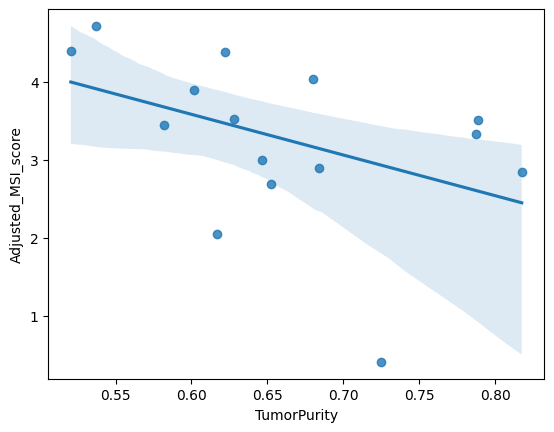

In [672]:
TumorPurity = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG-BULK/TumorPurity.tsv', sep='\t')
dict_PatientID_to_Purity = { str(tup.id) : float(tup.purity) for tup in TumorPurity.itertuples() }
STRProfileByPatient['TumorPurity'] = [ dict_PatientID_to_Purity[PID] for PID in STRProfileByPatient['PatientID'] ]
STRProfileByPatient_summary['TumorPurity'] = [ dict_PatientID_to_Purity[PID] for PID in STRProfileByPatient_summary['PatientID'] ]

STRProfileByPatient_summary['Adjusted_MSI_score'] = STRProfileByPatient_summary['MSI_score'] / STRProfileByPatient_summary['TumorPurity']
r, pval = scipy.stats.pearsonr( STRProfileByPatient_summary['TumorPurity'], STRProfileByPatient_summary['Adjusted_MSI_score'] )
sns.regplot(data=STRProfileByPatient_summary, x='TumorPurity', y='Adjusted_MSI_score')

dict_PatientID_to_AdjustedMSIscore = { tup.PatientID : tup.Adjusted_MSI_score  for tup in STRProfileByPatient_summary.itertuples() }
print(round(r, 3), round(pval, 3))

In [483]:
orders = STRProfileByPatient_summary.groupby(["PatientID"])['Adjusted_MSI_score'].aggregate(np.median).reset_index().sort_values('Adjusted_MSI_score')
orders

/tmp/ipykernel_180379/2818643993.py:1: FutureWarning: The provided callable <function median at 0x7f562cdd1760> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  orders = STRProfileByPatient_summary.groupby(["PatientID"])['Adjusted_MSI_score'].aggregate(np.median).reset_index().sort_values('Adjusted_MSI_score')


,PatientID,Adjusted_MSI_score
12,698,0.410229
2,1236,2.047275
13,786,2.692035
1,1105,2.851091
10,612,2.896132
11,649,2.994871
14,814,3.328334
7,1627,3.446317
9,490,3.509805
3,1253,3.529668


### Validate gene expression

In [509]:
Smillie_Immune_Marker = pd.read_csv('/node200data/18parkky/datasets/reference/marker_genes/colon/Smillie_et_al/colon_immune_marker.csv')
set(Smillie_Immune_Marker['ident'])

{'B.Bcells',
 'CD4+ Activated Fos-hi',
 'CD4+ Activated Fos-lo',
 'CD4+ Memory',
 'CD4+ PD1+',
 'CD69+ Mast',
 'CD69- Mast',
 'CD8+ IELs',
 'CD8+ IL17+',
 'CD8+ LP',
 'Cycling B',
 'Cycling Monocytes',
 'Cycling T',
 'DC1',
 'DC2',
 'Follicular',
 'GC',
 'I.Immune',
 'I.Lymphoid',
 'ILCs',
 'Inflammatory Monocytes',
 'M.DCs',
 'M.Mast',
 'M.Monocytes',
 'M.Myeloid',
 'MT-hi',
 'Macrophages',
 'NKs',
 'Plasma',
 'T.CD4',
 'T.CD8',
 'T.Tcells',
 'Tregs'}

In [676]:
AvailableGenes = list(SalmonOut['GeneName'])

In [634]:
intersecting_up = list(pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/CRC_MSI_intensity_analysis/DEGs/intersecting_up.txt', header=None)[0])
intersecting_dw = list(pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/CRC_MSI_intensity_analysis/DEGs/intersecting_down.txt', header=None)[0])

In [591]:
iCMS_marker = pd.read_csv('/node200data/18parkky/datasets/reference/marker_genes/colon/iCMS_marker/iCMS_marker_genes.csv')
iCMS2_up = [ g for g in list(iCMS_marker['iCMS2_Up']) if g in AvailableGenes ]
iCMS2_dw = [ g for g in list(iCMS_marker['iCMS2_Down']) if g in AvailableGenes ]
iCMS3_up = [ g for g in list(iCMS_marker['iCMS3_Up']) if g in AvailableGenes ]
iCMS3_dw = [ g for g in list(iCMS_marker['iCMS3_Down']) if g in AvailableGenes ]
print(len(iCMS2_up), len(iCMS2_dw), len(iCMS3_up), len(iCMS3_dw))

296 270 66 52


In [678]:
T_cell_markers = [g for g in list(Smillie_Immune_Marker[Smillie_Immune_Marker['ident']=='T.Tcells']['gene']) if g in AvailableGenes]
len(T_cell_markers)

147

In [629]:
T_cell_markers = iCMS3_up
len(T_cell_markers)

66

In [679]:
SalmonOut_oi = SalmonOut[(SalmonOut['GeneName'].isin(T_cell_markers))][['GeneName'] + list(orders['PatientID'])].copy()
SalmonOut_oi= SalmonOut_oi.T
SalmonOut_oi.columns = SalmonOut_oi.iloc[0]
SalmonOut_oi.drop(labels='GeneName', axis=0, inplace=True)
SalmonOut_oi.index.name = None 
SalmonOut_oi['MeanExpression'] = [ np.mean(list(tup)[1:]) for tup in SalmonOut_oi.itertuples() ]
SalmonOut_oi.reset_index(inplace=True)
SalmonOut_oi.columns = ['PatientID'] + T_cell_markers + ['MeanExpression']

SalmonOut_oi['Adjusted_MSI_score'] = [ dict_PatientID_to_AdjustedMSIscore[PID] for PID in SalmonOut_oi['PatientID'] ]
SalmonOut_oi['Adjusted_MeanExpression'] = [ tup.MeanExpression * dict_PatientID_to_Purity[tup.PatientID] for tup in SalmonOut_oi.itertuples() ]
SalmonOut_oi['TumorPurity'] = [  dict_PatientID_to_Purity[PID] for PID in SalmonOut['PatientID'] ]
SalmonOut_oi['MSI_score'] = SalmonOut_oi['Adjusted_MSI_score'] * SalmonOut_oi['TumorPurity']

r, pval = scipy.stats.pearsonr( SalmonOut_oi['Adjusted_MSI_score'], SalmonOut_oi['MeanExpression'] )
print(round(r, 2), round(pval, 2))
sns.regplot(data=SalmonOut_oi, x='Adjusted_MSI_score', y='MeanExpression')

KeyError: 'PatientID'

In [658]:
SalmonOut_oi

,PatientID,FASLG,ZNF683,KLRC2,TRGC1,CD8A,CD160,NKG7,TMSB4X,CD8B,...,ARPC2,ARPC1B,LSP1,GMFG,S100A4,MeanExpression,Adjusted_MSI_score,Adjusted_MeanExpression,TumorPurity,MSI_score
0,698,17.027497,50.332832,11.109533,3.312832,2.599034,0.670193,0.60905,10.511114,0.249546,...,13.848666,9.021094,0.305838,3.527416,0.0,36.277100,0.410229,26.291776,0.724749,0.297313
1,1236,3.115272,53.719624,17.434347,3.500579,5.23423,5.14851,0.526463,11.739229,0.415469,...,33.388172,21.414973,2.326533,4.772965,0.064745,75.711597,2.047275,46.702929,0.616853,1.262868
2,786,2.03036,96.100472,11.61462,4.035442,1.487193,2.961654,0.353589,7.465326,0.181788,...,23.17804,24.090146,0.315332,3.278892,0.0,51.313051,2.692035,33.475449,0.652377,1.756221
3,1105,1.859621,64.554791,5.359948,1.314907,0.51855,0.679551,0.189121,5.297895,0.11772,...,20.57186,13.971632,0.294142,2.614499,0.001039,62.030904,2.851091,50.715121,0.817578,2.330990
4,612,2.159259,140.493219,10.093412,2.700822,1.665222,1.110469,0.363777,6.832225,0.087816,...,26.402324,29.782286,0.547074,4.637539,0.0,62.747427,2.896132,42.917370,0.683970,1.980868
5,649,3.443732,165.537572,17.483829,6.393737,3.382266,11.626335,1.438572,10.420267,0.521984,...,22.059079,28.344249,2.95149,5.870289,0.0,53.742785,2.994871,34.740759,0.646426,1.935964
6,814,2.110943,102.636725,16.315278,3.421289,2.94143,1.559259,2.043482,8.681666,0.260744,...,18.628348,22.043032,0.450671,5.661105,0.0,63.800317,3.328334,50.252808,0.787658,2.621587
7,1627,2.590261,97.762339,21.365843,4.040583,5.013485,2.834899,0.99506,9.547172,0.336362,...,25.134827,23.463362,0.766356,5.31,0.0,38.985810,3.446317,22.690896,0.582030,2.005859
8,490,2.305628,71.782688,12.178395,2.80818,1.144153,0.738101,0.232877,10.348841,0.175804,...,18.742296,27.659413,0.271238,5.625303,0.0,59.222182,3.509805,46.696956,0.788504,2.767497
9,1253,2.53061,152.698098,16.588658,4.737675,1.762326,1.2225,0.643778,8.422326,0.420786,...,26.064086,16.740732,0.930672,5.552327,0.057565,51.189105,3.529668,32.140927,0.627886,2.216229
